In [1]:
# import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',None)

In [3]:
# read dataset
df = pd.read_csv("PEP1.csv")

In [4]:
# print the top 5 records
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# print the last 5 records
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
# print the name of the columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'Bedroom', 'Kitchen', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDe

In [7]:
# print the df index
df.index

RangeIndex(start=0, stop=1460, step=1)

In [8]:
# print the shape of the dataset
df.shape

(1460, 81)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
# drop column 'Id' because it is redundant
#df.drop(columns = ['Id'], inplace=True)

In [11]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# check null values per column
df.isna().sum(axis = 0)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [14]:
# print the numerical and categorical variables

# numerical
df.select_dtypes(exclude='O').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [15]:
# categorical
df.select_dtypes(include='O').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
# print the unique values for every categorical value
categ_variables = df.select_dtypes(include='O').columns

for c_var in categ_variables:
    print(c_var)
    print(df[c_var].unique())
    print()

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']

Street
['Pave' 'Grvl']

Alley
[nan 'Grvl' 'Pave']

LotShape
['Reg' 'IR1' 'IR2' 'IR3']

LandContour
['Lvl' 'Bnk' 'Low' 'HLS']

Utilities
['AllPub' 'NoSeWa']

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope
['Gtl' 'Mod' 'Sev']

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'mes' 'SawyerW' 'IDOTRR' 'MeadowV'
 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill' 'Blmngtn'
 'BrDale' 'SWISU' 'Blueste']

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']

Exterior1st
['Vinyl

# EDA of numerical variables

In [17]:
num_variables = df.select_dtypes(exclude='O').columns
num_variables

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [18]:
# mean of df
df.mean()

Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
Bedroom               2.866438
Kitchen               1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPo

In [19]:
# median of df
df.median()

Id                  730.5
MSSubClass           50.0
LotFrontage          69.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
Bedroom               3.0
Kitchen               1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageYrBlt        1980.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
dtype: float

In [20]:
# mode of df
df.mode(axis=0).head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20.0,RL,60.0,7200.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,6.0,2009.0,WD,Normal,140000.0


In [21]:
# use describe to get various statistical info about the dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Missing value treatment

In [22]:
# display the missing values per categorical columns

cat_series = df[categ_variables].isna().sum(axis = 0)
cat_with_null = cat_series[cat_series > 0]
print(cat_with_null)

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [23]:
# display the percentage of missing values accross the dataset
(cat_with_null/df.shape[0])*100

Alley           93.767123
MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [24]:
# we can delete entirely the columns 'Alley', 'PoolQC', 'Fence', 'MiscFeature'
# since they alsmost consist of null values
df.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

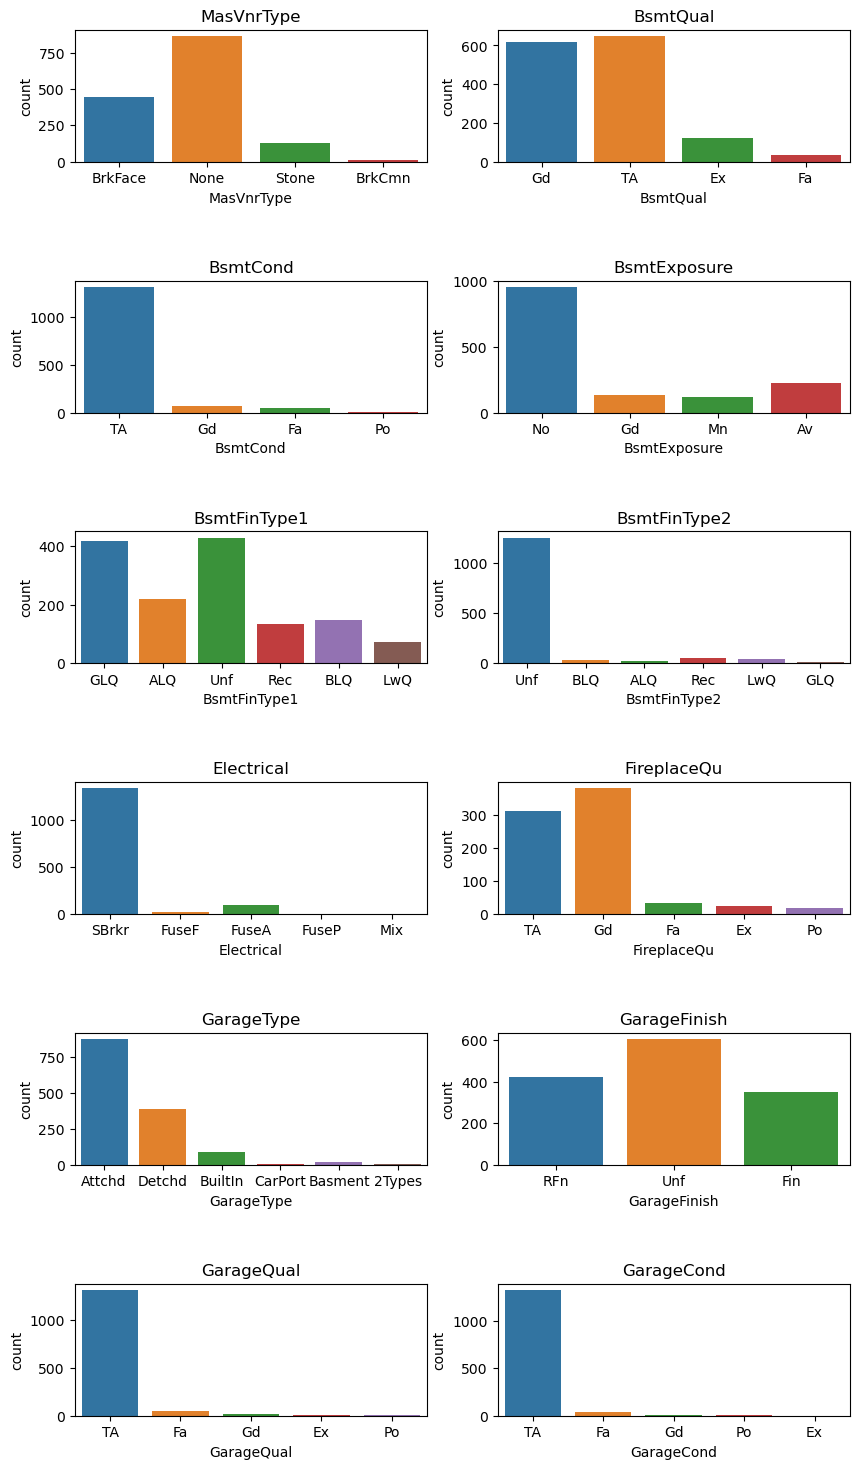

In [25]:
# Count plot for bivariate analysis for the remaining categorical columns with missing values
columns_to_display = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                      'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

plt.figure(figsize=(10,18))
plt.subplots_adjust(hspace=.9)

for i in range(1, len(columns_to_display) + 1):   
    plt.subplot(6,2,i)
    plt.title(columns_to_display[i-1])
    sns.countplot(x=columns_to_display[i-1], data=df)
plt.show()

In [26]:
# for MasVnrType impute the mode 
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [27]:
# for BsmtCond impute the mode 
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [28]:
# for BsmtExposure impute the mode 
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [29]:
# for BsmtFinType2 impute the mode 
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [30]:
# for Electrical impute the mode 
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [31]:
# for GarageType impute the mode 
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

In [32]:
# for GarageQual impute the mode 
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])

In [33]:
# for GarageCond impute the mode 
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [34]:
df[df['Fireplaces'] == 0].count()
df['FireplaceQu'] = df['FireplaceQu'].fillna('missingFireplace')

# we can impute the 'missing fireplace' for 'FireplaceQu' column missing values,
# since those values does not exist when there is no fireplace

In [35]:
df[df['GarageCars'] == 0].count()
df['GarageFinish'] = df['GarageFinish'].fillna('missingGarage')
# we can impute the 'missing garage' for 'GarageFinish' column missing values,
# since those values does not exist when there is no garage

In [36]:
df[df['TotalBsmtSF'] == 0].count()
df['BsmtQual'] = df['BsmtQual'].fillna('missingBasement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('missingBasement')
# we can impute the 'missing basement' for 'BsmtQual' and 'BsmtFinType1' column missing values,
# since those values does not exist when there is no basement

In [37]:
# no missing categorical column values after imputation
categ_variables = df.select_dtypes(include='O').columns
df[categ_variables].isna().sum(axis = 0)[df[categ_variables].isna().sum(axis = 0) > 0]

Series([], dtype: int64)

In [38]:
# display the missing values per numerical columns

df[num_variables].isna().sum(axis = 0)

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
Bedroom            0
Kitchen            0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

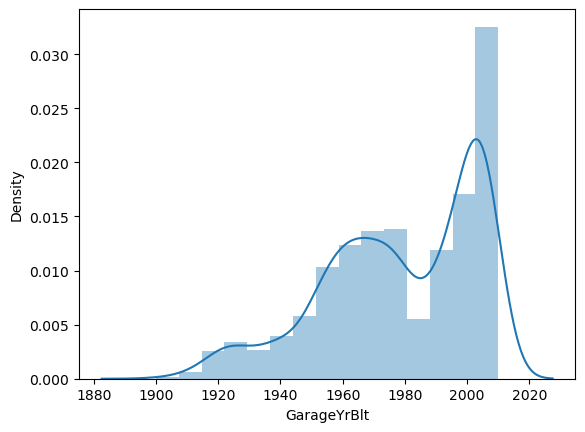

In [39]:
# display the distribution for LotFrontage column

sns.distplot(df['GarageYrBlt'])
plt.show()

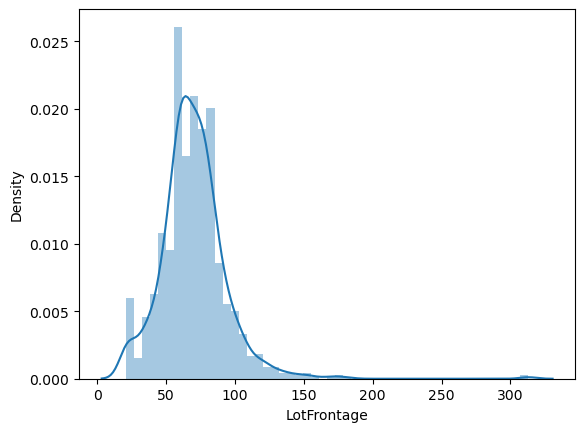

In [40]:
# display the distribution for LotFrontage column

sns.distplot(df['LotFrontage'])
plt.show()

In [41]:
def outlier_treatment(col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    upper_bound = q3 + 1.5*(q3-q1)
    lower_bound = q1 - 1.5*(q3-q1)
    return lower_bound,upper_bound

In [42]:
columns = ['LotFrontage']

total_index = []

for col in columns:
    lower_range,upper_range = outlier_treatment(col)
    print("Lower Range for {}:".format(col),lower_range)
    print("Upper Range for {}:".format(col),upper_range)
    print()
    
    lower_index = list(df[df[col].values < lower_range].index)
    upper_index = list(df[df[col].values > upper_range].index)    
    
    print("Total Lower Indexes for {}:".format(col),len(lower_index))
    print("Total Upper Indexes for {}:".format(col),len(upper_index))
    print("Total Number of Outliers for {}:".format(col),len(lower_index + upper_index))
    print()
    
    total_index += list(lower_index + upper_index)

Lower Range for LotFrontage: 27.5
Upper Range for LotFrontage: 111.5

Total Lower Indexes for LotFrontage: 42
Total Upper Indexes for LotFrontage: 46
Total Number of Outliers for LotFrontage: 88



In [43]:
# there are 88 outliers for the column LotFrontage,
# those rows can de removed because they represent only the 0.06% of the whole dataset

print("Shape before dropping outlier rows:", df.shape)
df.drop(total_index, inplace = True)
print("Shape after dropping outlier rows:", df.shape)

Shape before dropping outlier rows: (1460, 77)
Shape after dropping outlier rows: (1372, 77)


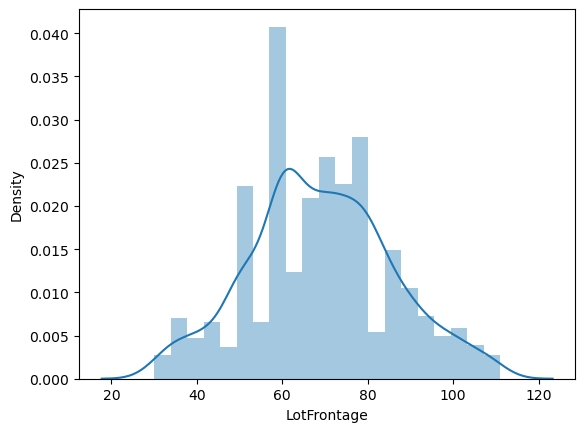

In [44]:
sns.distplot(df['LotFrontage'])
plt.show()

In [45]:
# Impute missing values for 'LotFrontage' column with median
df.LotFrontage.fillna(value = df.LotFrontage.median(), inplace=True)

In [46]:
# Impute missing values for 'GarageYrBlt' column with -1,
# since null values exist only when 'GarageCars' are 0
df.GarageYrBlt.fillna(value = -1, inplace=True)

In [47]:
# Another way to deal with missing values treatment for columns 'LotFrontage' and 'GarageYrBlt' ????
# what I did to deal with missing values was to impute the median value for both columns after deleting the outliers, 
# 'LotFrontage' outliers are 6% of total dataset

# LotFrontage has 0.35 corr with SalePrice. Can we drop the entire column???

# for GarageYrBlt since it has a high correlation with YearBlt (0.83) and since YearBlt has higher corr (0.52) with SalePrice than GarageYrBlt (0.49) 
# can we drop entirely the column GarageYrBlt ???

In [48]:
df[num_variables].isna().sum(axis = 0)

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
Bedroom          0
Kitchen          0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [49]:
df.shape

(1372, 77)

# Identify the skewness and distribution

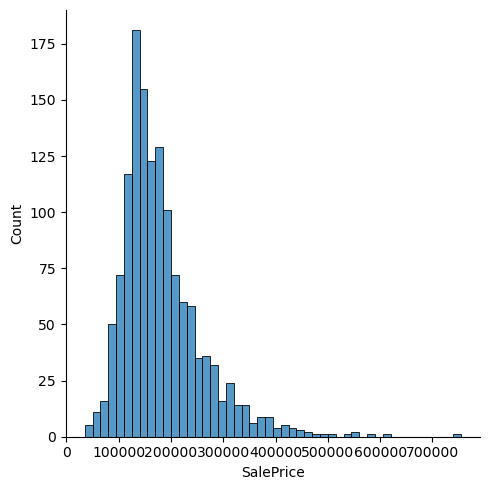

In [50]:
# SalePrice
sns.displot(df.SalePrice) # histogram, frequency bar

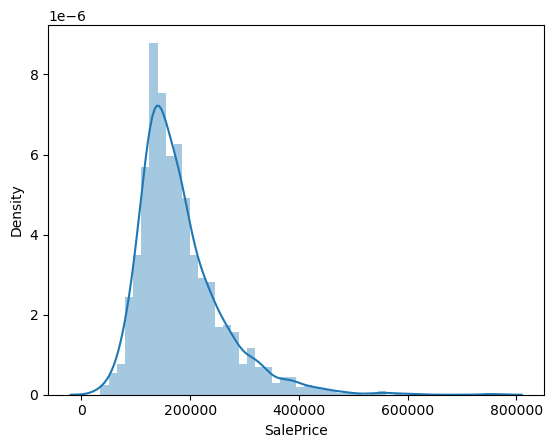

In [51]:
sns.distplot(df.SalePrice)
plt.show()

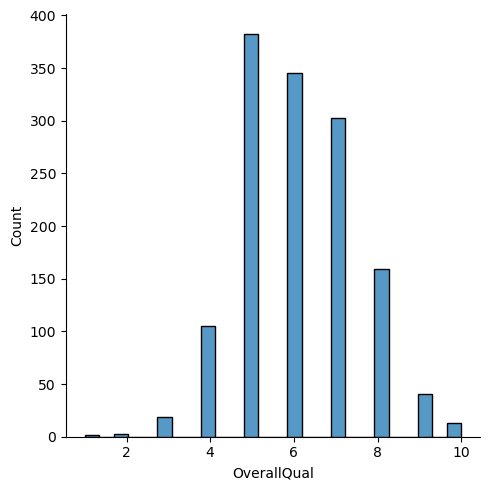

In [52]:
# OverallQual
sns.displot(df.OverallQual) # histogram, frequency bar

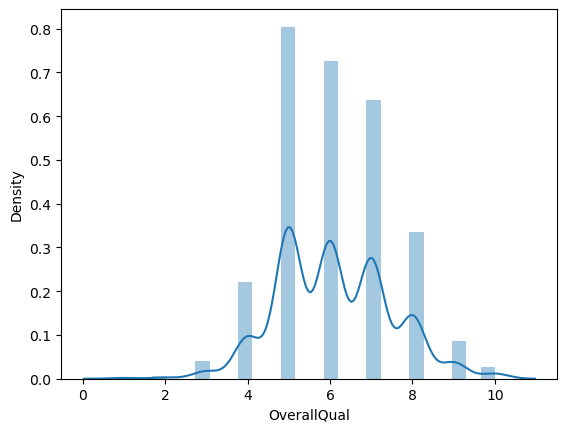

In [53]:
sns.distplot(df.OverallQual)
plt.show()

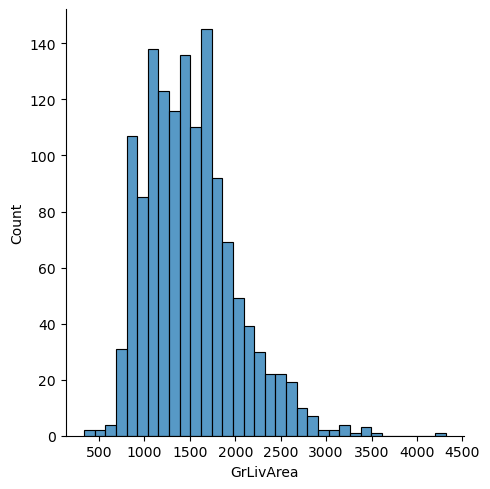

In [54]:
# GrLivArea
sns.displot(df.GrLivArea) # histogram, frequency bar

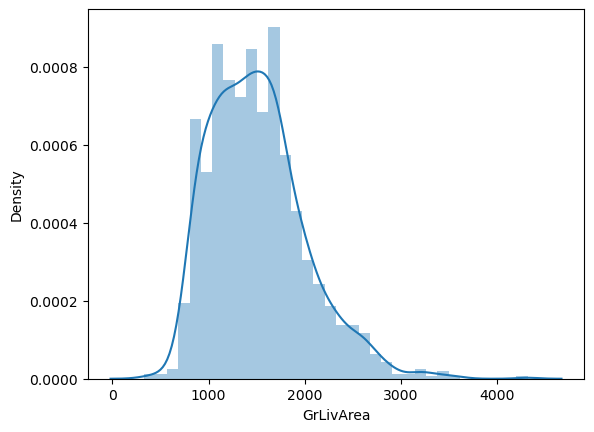

In [55]:
sns.distplot(df.GrLivArea)
plt.show()

<AxesSubplot: xlabel='GrLivArea'>

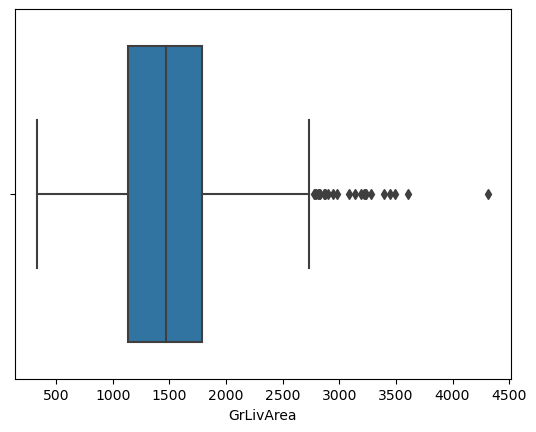

In [56]:
# box plot to identify the GrLivArea outliers
sns.boxplot(x = df.GrLivArea)

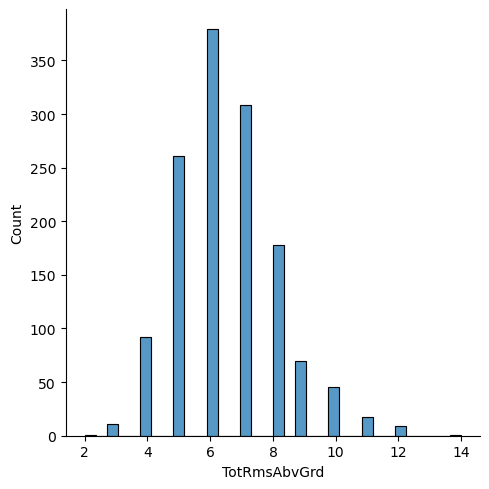

In [57]:
# TotRmsAbvGrd
sns.displot(df.TotRmsAbvGrd) # histogram, frequency bar

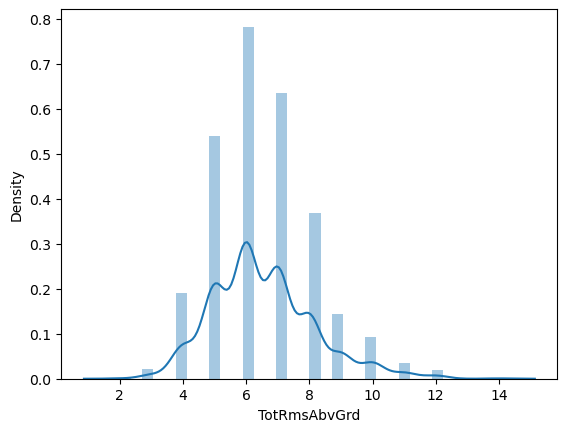

In [58]:
sns.distplot(df.TotRmsAbvGrd)
plt.show()

<AxesSubplot: xlabel='TotRmsAbvGrd'>

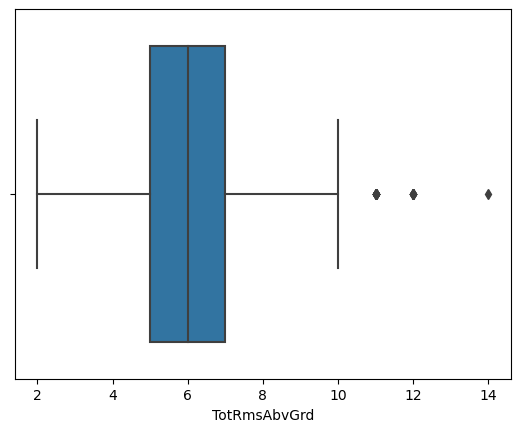

In [59]:
# box plot to identify the TotRmsAbvGrd outliers
sns.boxplot(x = df.TotRmsAbvGrd)

# Identify significant variables using a correlation matrix

In [60]:
# using a correlation matrix

df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.013559,-0.037947,-0.028933,-0.034419,0.005371,-0.009846,-0.023907,-0.053976,-0.024704,...,-0.029408,-0.000092,0.021885,-0.045041,-0.003663,0.059430,-0.007039,0.018023,0.010351,-0.028692
MSSubClass,0.013559,1.000000,-0.281236,-0.086494,0.068189,-0.069220,0.016745,0.059396,-0.001385,-0.052634,...,0.007173,0.033101,0.011042,-0.038670,-0.010524,0.008185,-0.001814,-0.011334,-0.030072,-0.027239
LotFrontage,-0.037947,-0.281236,1.000000,0.181318,0.237561,-0.058717,0.175575,0.069619,0.264746,0.120521,...,0.101171,0.089321,-0.065754,0.069591,0.057154,0.022569,0.002329,0.029256,0.012259,0.354866
LotArea,-0.028933,-0.086494,0.181318,1.000000,0.080383,0.008753,0.021667,0.017927,0.113508,0.167390,...,0.216666,0.069552,-0.039324,0.022433,0.056294,0.025257,0.048014,0.003747,-0.028699,0.250913
OverallQual,-0.034419,0.068189,0.237561,0.080383,1.000000,-0.090199,0.579207,0.548141,0.404726,0.210930,...,0.233561,0.299343,-0.135397,0.030560,0.070861,0.004620,-0.030368,0.071557,-0.015000,0.804046
OverallCond,0.005371,-0.069220,-0.058717,0.008753,-0.090199,1.000000,-0.378671,0.070757,-0.122206,-0.047374,...,-0.003591,-0.031825,0.094180,0.033287,0.051331,0.024030,0.070839,-0.008483,0.039421,-0.079615
YearBuilt,-0.009846,0.016745,0.175575,0.021667,0.579207,-0.378671,1.000000,0.594199,0.320067,0.263703,...,0.221577,0.192009,-0.401466,0.031892,-0.045557,0.003968,-0.033025,0.017875,-0.006690,0.547067
YearRemodAdd,-0.023907,0.059396,0.069619,0.017927,0.548141,0.070757,0.594199,1.000000,0.183778,0.124316,...,0.201747,0.219099,-0.205187,0.049197,-0.040691,-0.013398,-0.009264,0.024230,0.043307,0.519389
MasVnrArea,-0.053976,-0.001385,0.264746,0.113508,0.404726,-0.122206,0.320067,0.183778,1.000000,0.246380,...,0.151137,0.115943,-0.125386,0.014395,0.071148,-0.011062,-0.029579,-0.003916,0.005620,0.501929
BsmtFinSF1,-0.024704,-0.052634,0.120521,0.167390,0.210930,-0.047374,0.263703,0.124316,0.246380,1.000000,...,0.212220,0.068455,-0.126481,0.028644,0.069018,0.002392,0.005395,-0.010384,0.014442,0.391415


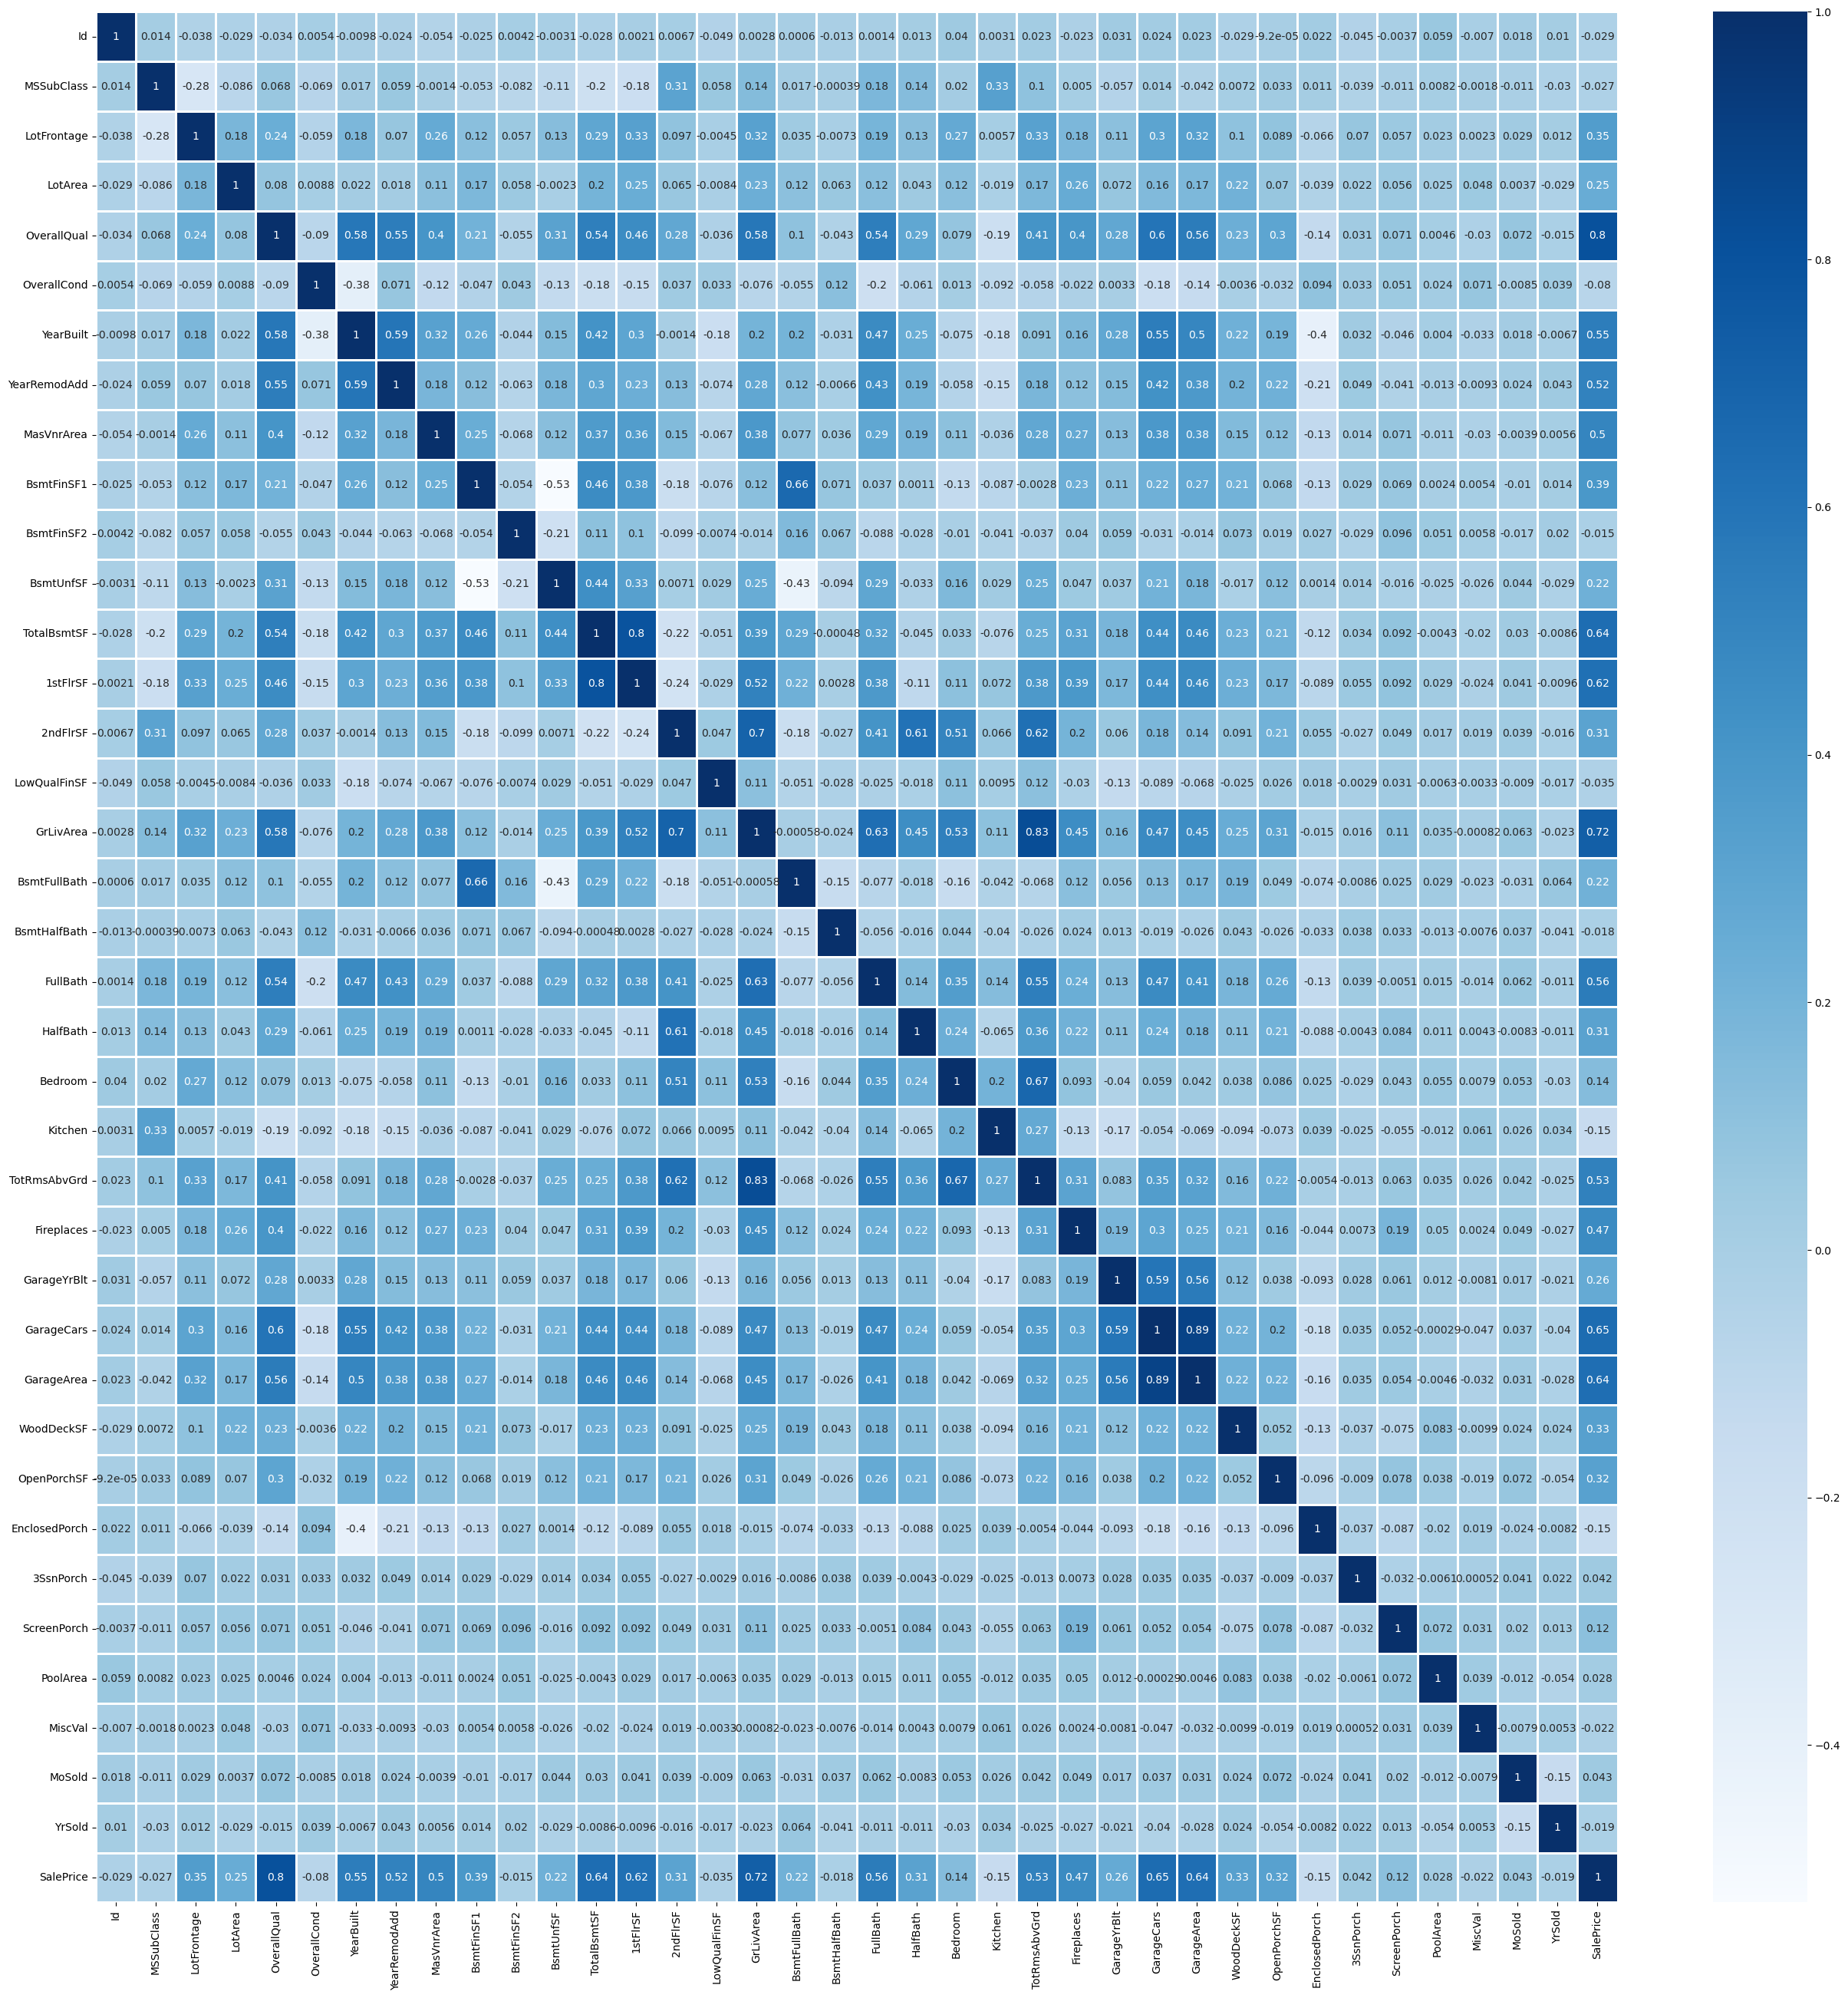

In [61]:
# using a heatmap to better visualize the correlations of the dataset

plt.figure(figsize=(32,32))
sns.heatmap(df.select_dtypes(exclude='O').corr(),annot=True, cmap = 'Blues',linecolor='w', linewidths=2)
plt.show()

# Inferences taken from the correlation matrix

1. SalesPrice is highly correlated with OverallQual, GrLivArea, TotalBsmtSF, 1stFlrSF, GarageCars, GarageArea (take those with corr > 0.6 with SalesPrice)
2. GarageArea is higly related to GarageCars
3. YearBuilt has a strong relation with GarageYrBlt

# Pair plot for distribution and density

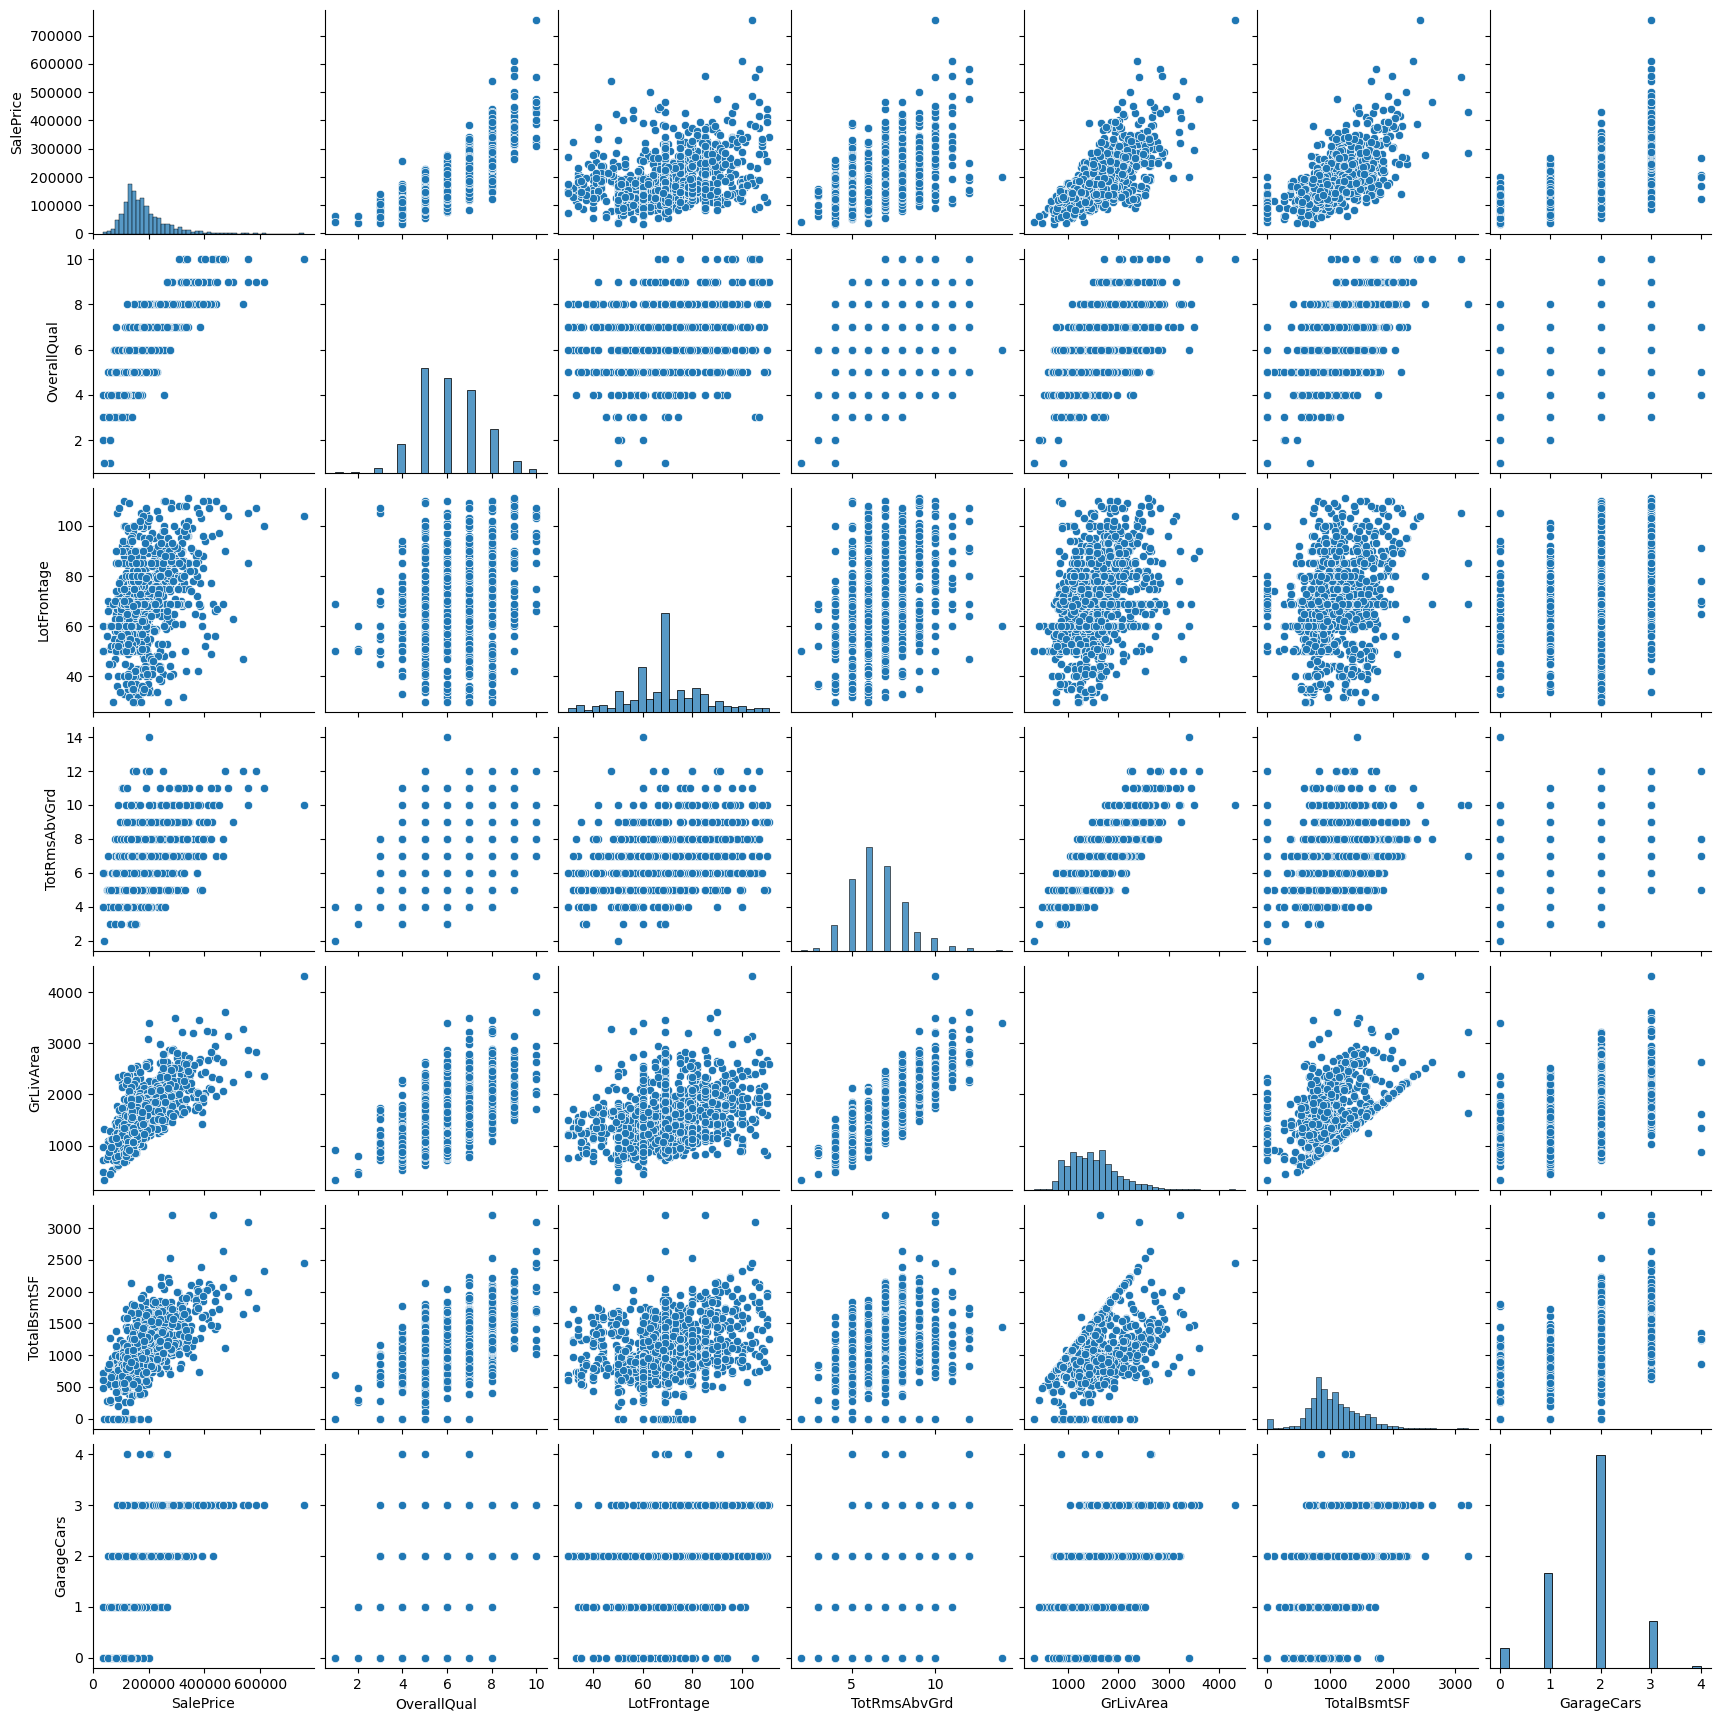

In [62]:
sns.pairplot(df.select_dtypes(exclude="O"), vars = ['SalePrice', 'OverallQual', 'LotFrontage', 'TotRmsAbvGrd', 'GrLivArea', 'TotalBsmtSF', 'GarageCars'])

### EDA of categorical variables 

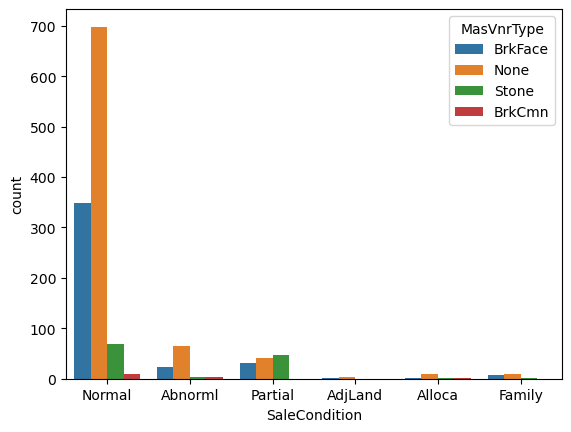

In [63]:
# Count plot for bivariate analysis between SaleCondition and MasVnrType
sns.countplot(data=df, x='SaleCondition', hue='MasVnrType')
plt.show()

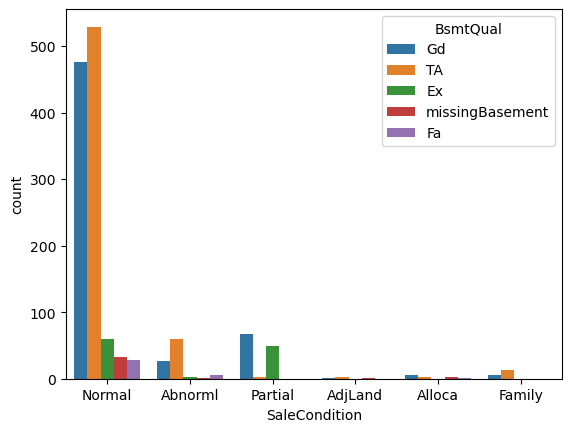

In [64]:
# Count plot for bivariate analysis between SaleCondition and BsmtQual
sns.countplot(data=df, x='SaleCondition', hue='BsmtQual')
plt.show()

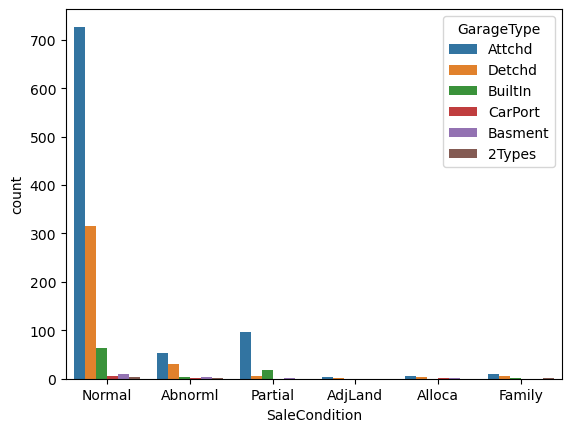

In [65]:
# Count plot for bivariate analysis between SaleCondition and GarageType
sns.countplot(data=df, x='SaleCondition', hue='GarageType')
plt.show()

### Identify significant categorical variables using p-values and Chi-Square values

In [66]:
# display the categorical variables
categ_variables

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [67]:
df_new = df[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice']]
df_new.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,missingFireplace,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,250000


In [68]:
# Create a Sale price bin to convert target variable to caregorical
# the price will be seperated to bins according to following rules:

# cheap: below 250000
# average: below 400000
# above_average: below 550000
# expensive: below 700000
# most_expensive: below 755000 (max SalePrice)

def sale_price_bins(x):  
    
    if x != x: # or pd.isna(x), or np.isnan(x) from numpy
        return 'missing'
    elif x < 250000:
        return 'cheap'
    elif x < 400000:
        return 'average'
    elif x < 550000:
        return 'above_average'
    elif x < 700000:
        return 'expensive'
    else:
        return 'most_expensive'

In [69]:
df_new['sale_price_bins'] = df_new.SalePrice.apply(sale_price_bins)

In [70]:
df_new.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice,sale_price_bins
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,missingFireplace,Attchd,RFn,TA,TA,Y,WD,Normal,208500,cheap
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,Y,WD,Normal,181500,cheap
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,WD,Normal,223500,cheap
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000,cheap
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,WD,Normal,250000,average


In [71]:
# for each categorical variable use chi-square test to test if the related variable is independent or not to the target price_bins categorical variable
# Ho: the 2 categorical vars are independent
# Ha: the 2 categorical vars are dependent

dependent_columns = []

for i in categ_variables:
    pivot_df = pd.crosstab(df[i], df_new.sale_price_bins)
    chi2, p, dof, ex = chi2_contingency(pivot_df, correction=False)
    
    #print(chi2, '{:.10f}'.format(p))
    
    if p < 0.05:                        
        dependent_columns.append(i)        

dependent_columns.append('SalePrice')
print(dependent_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice']


In [72]:
# there are 26 out of 39 categorical variables which have some dependency with the target caregorical variable 'sale_price_bins'
# encode those value and use heatmap to further distinguish only the most important ones
df_dep_categorical_new = df[dependent_columns]

In [73]:
import category_encoders as ce

encoder = ce.ordinal.OrdinalEncoder(return_df = True)  
df_train = encoder.fit_transform(df_dep_categorical_new)

In [74]:
df_train.head()

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,PavedDrive,SaleType,SaleCondition,SalePrice
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,208500
1,1,1,1,2,2,2,1,1,2,2,...,1,2,2,1,1,1,1,1,1,181500
2,1,2,1,1,1,1,1,1,1,1,...,1,1,2,1,1,1,1,1,1,223500
3,1,2,1,3,3,1,1,1,3,3,...,1,1,3,2,2,1,1,1,2,140000
4,1,2,1,2,4,1,1,1,1,1,...,1,1,2,1,1,1,1,1,1,250000


<AxesSubplot: >

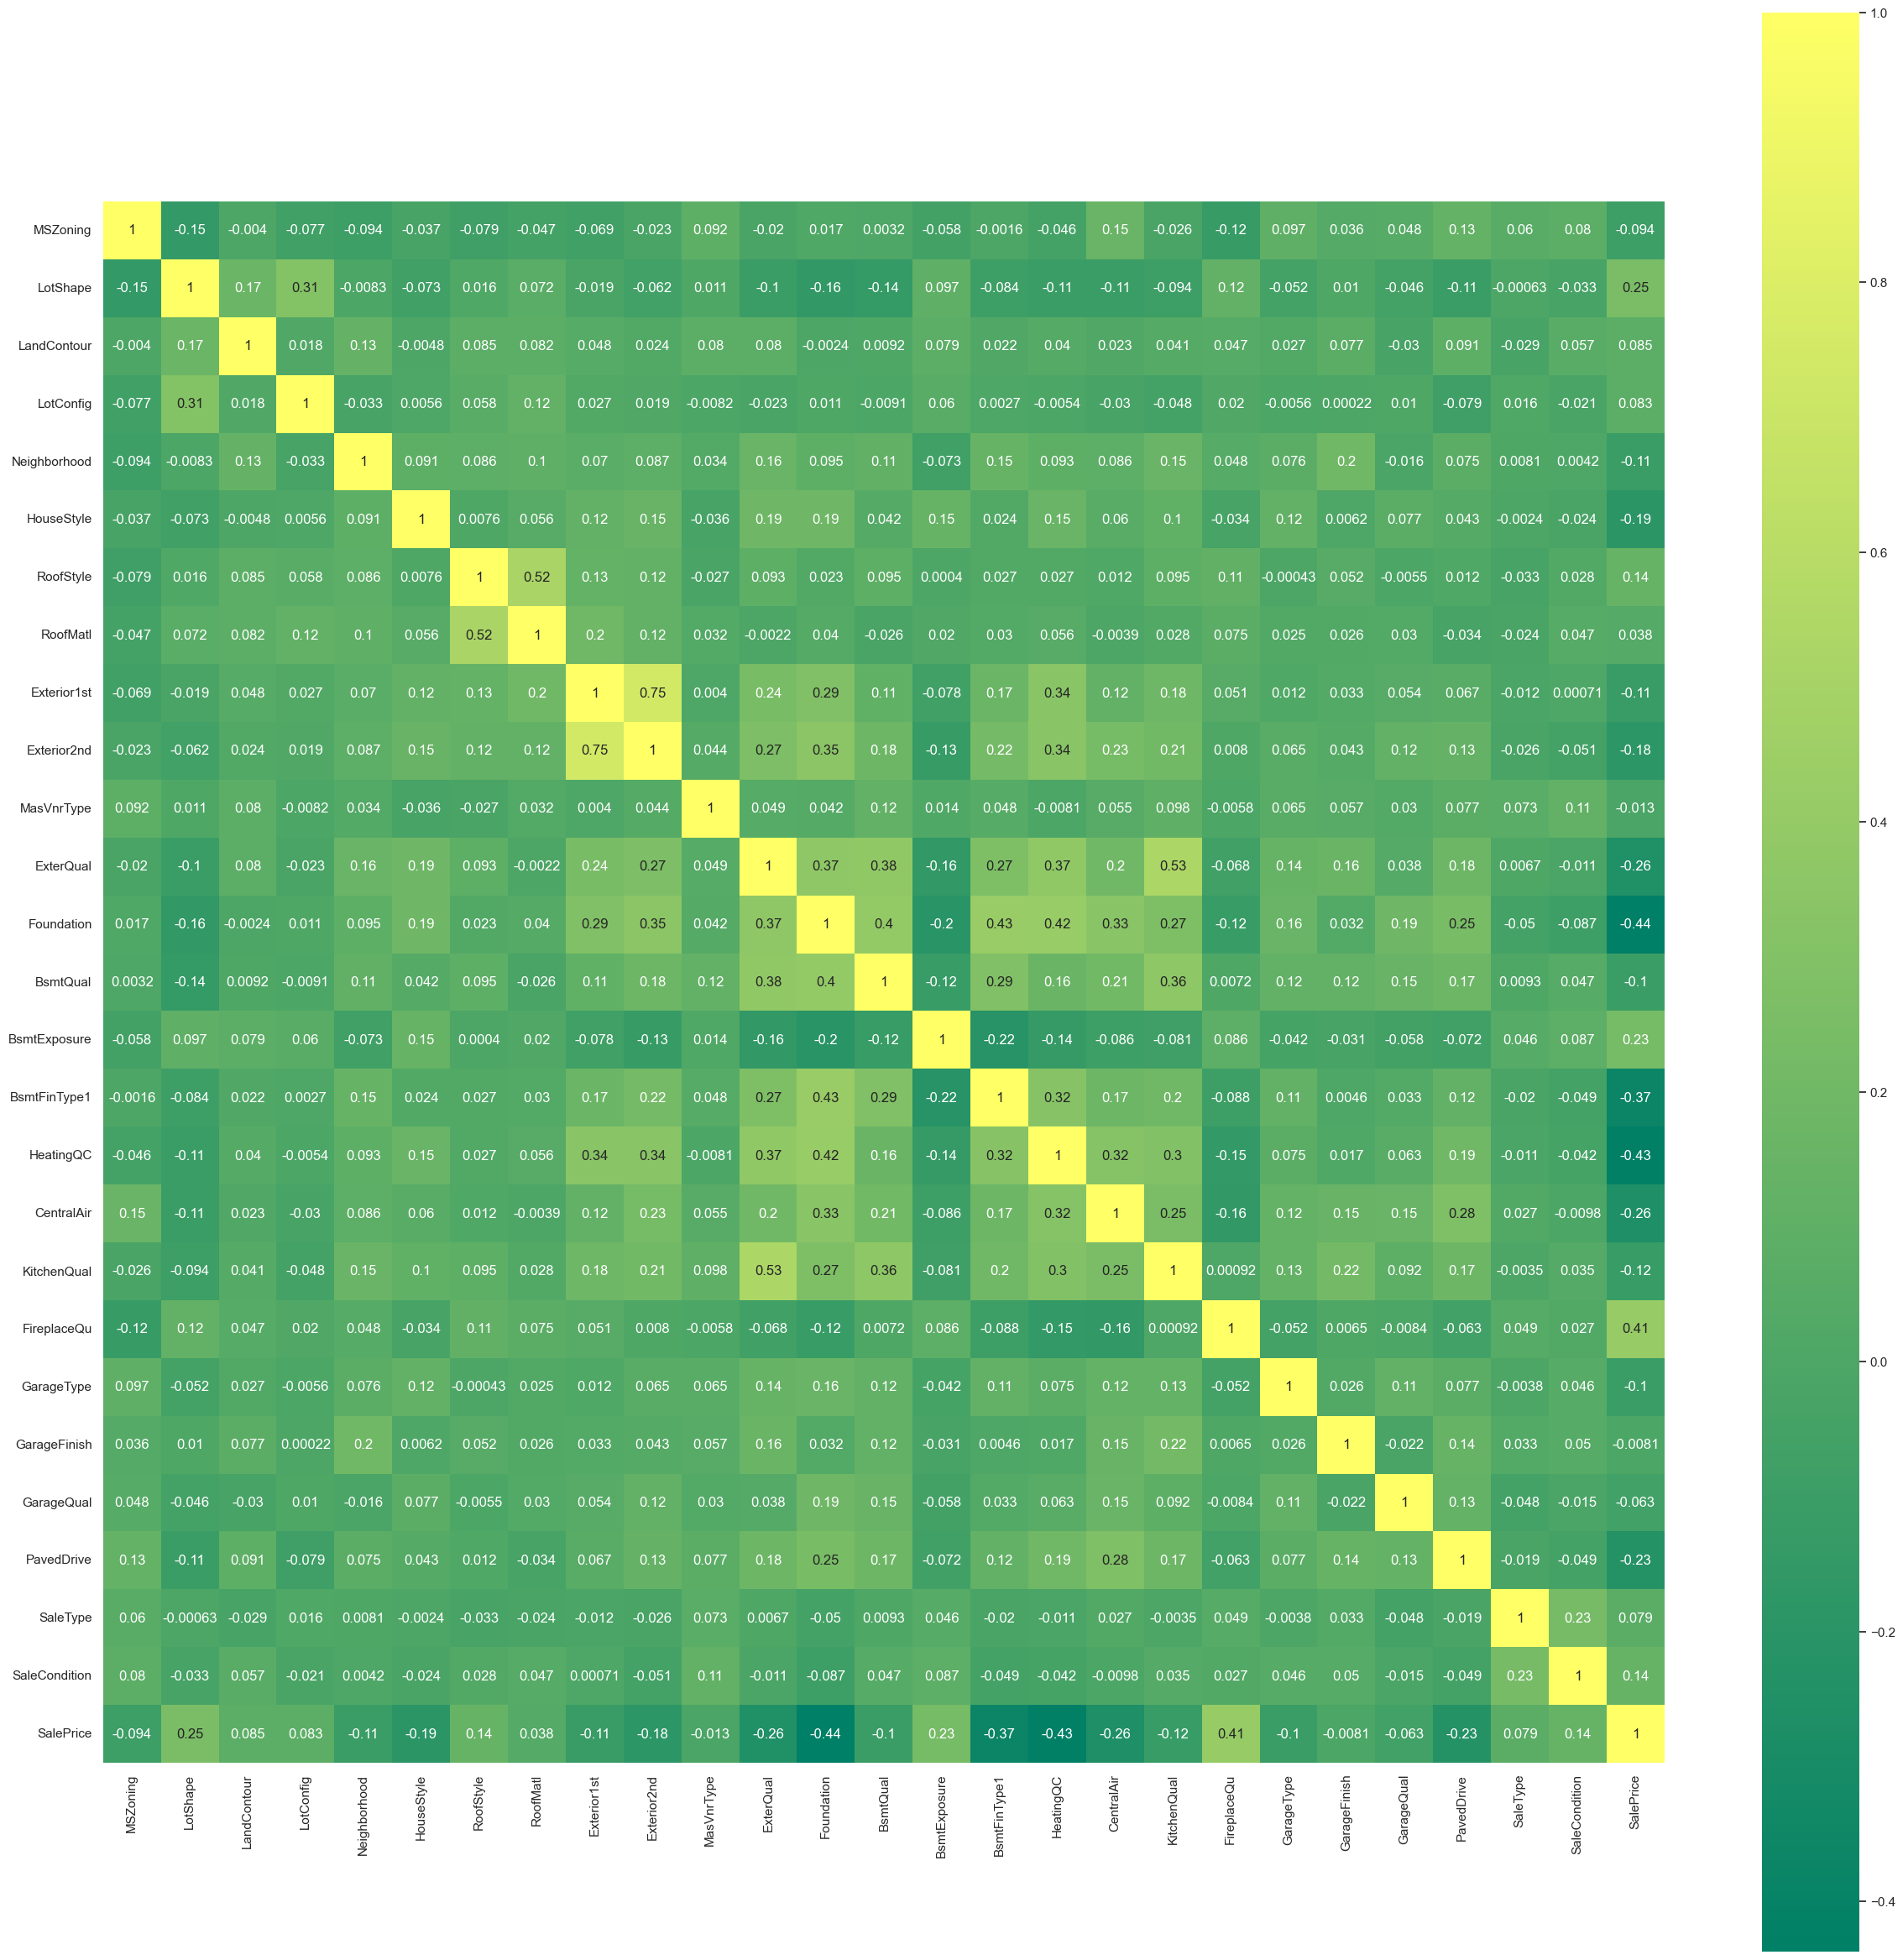

In [75]:
sns.set(rc={'figure.figsize':(30,30)})
color = plt.get_cmap('summer')   # default color
color.set_bad('lightblue')
sns.heatmap(data=df_train.corr(), square=True, annot=True, fmt='.2g',  cmap= color)

### keep only variables with cor > 0.4 or < -0.4

1. SalesPrice is correlated with Foundation, HeatingQC, FireplaceQu    

## Combine all the significant categorical and numerical variables

In [76]:
df_ready = df[['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'Foundation', 'FireplaceQu', 'HeatingQC', 'SalePrice']]

In [77]:
df_ready.head()

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea,Foundation,FireplaceQu,HeatingQC,SalePrice
0,7,1710,856,856,2,548,PConc,missingFireplace,Ex,208500
1,6,1262,1262,1262,2,460,CBlock,TA,Ex,181500
2,7,1786,920,920,2,608,PConc,TA,Ex,223500
3,7,1717,756,961,3,642,BrkTil,Gd,Gd,140000
4,8,2198,1145,1145,3,836,PConc,TA,Ex,250000


In [78]:
df_ready.shape

(1372, 10)

<AxesSubplot: xlabel='OverallQual'>

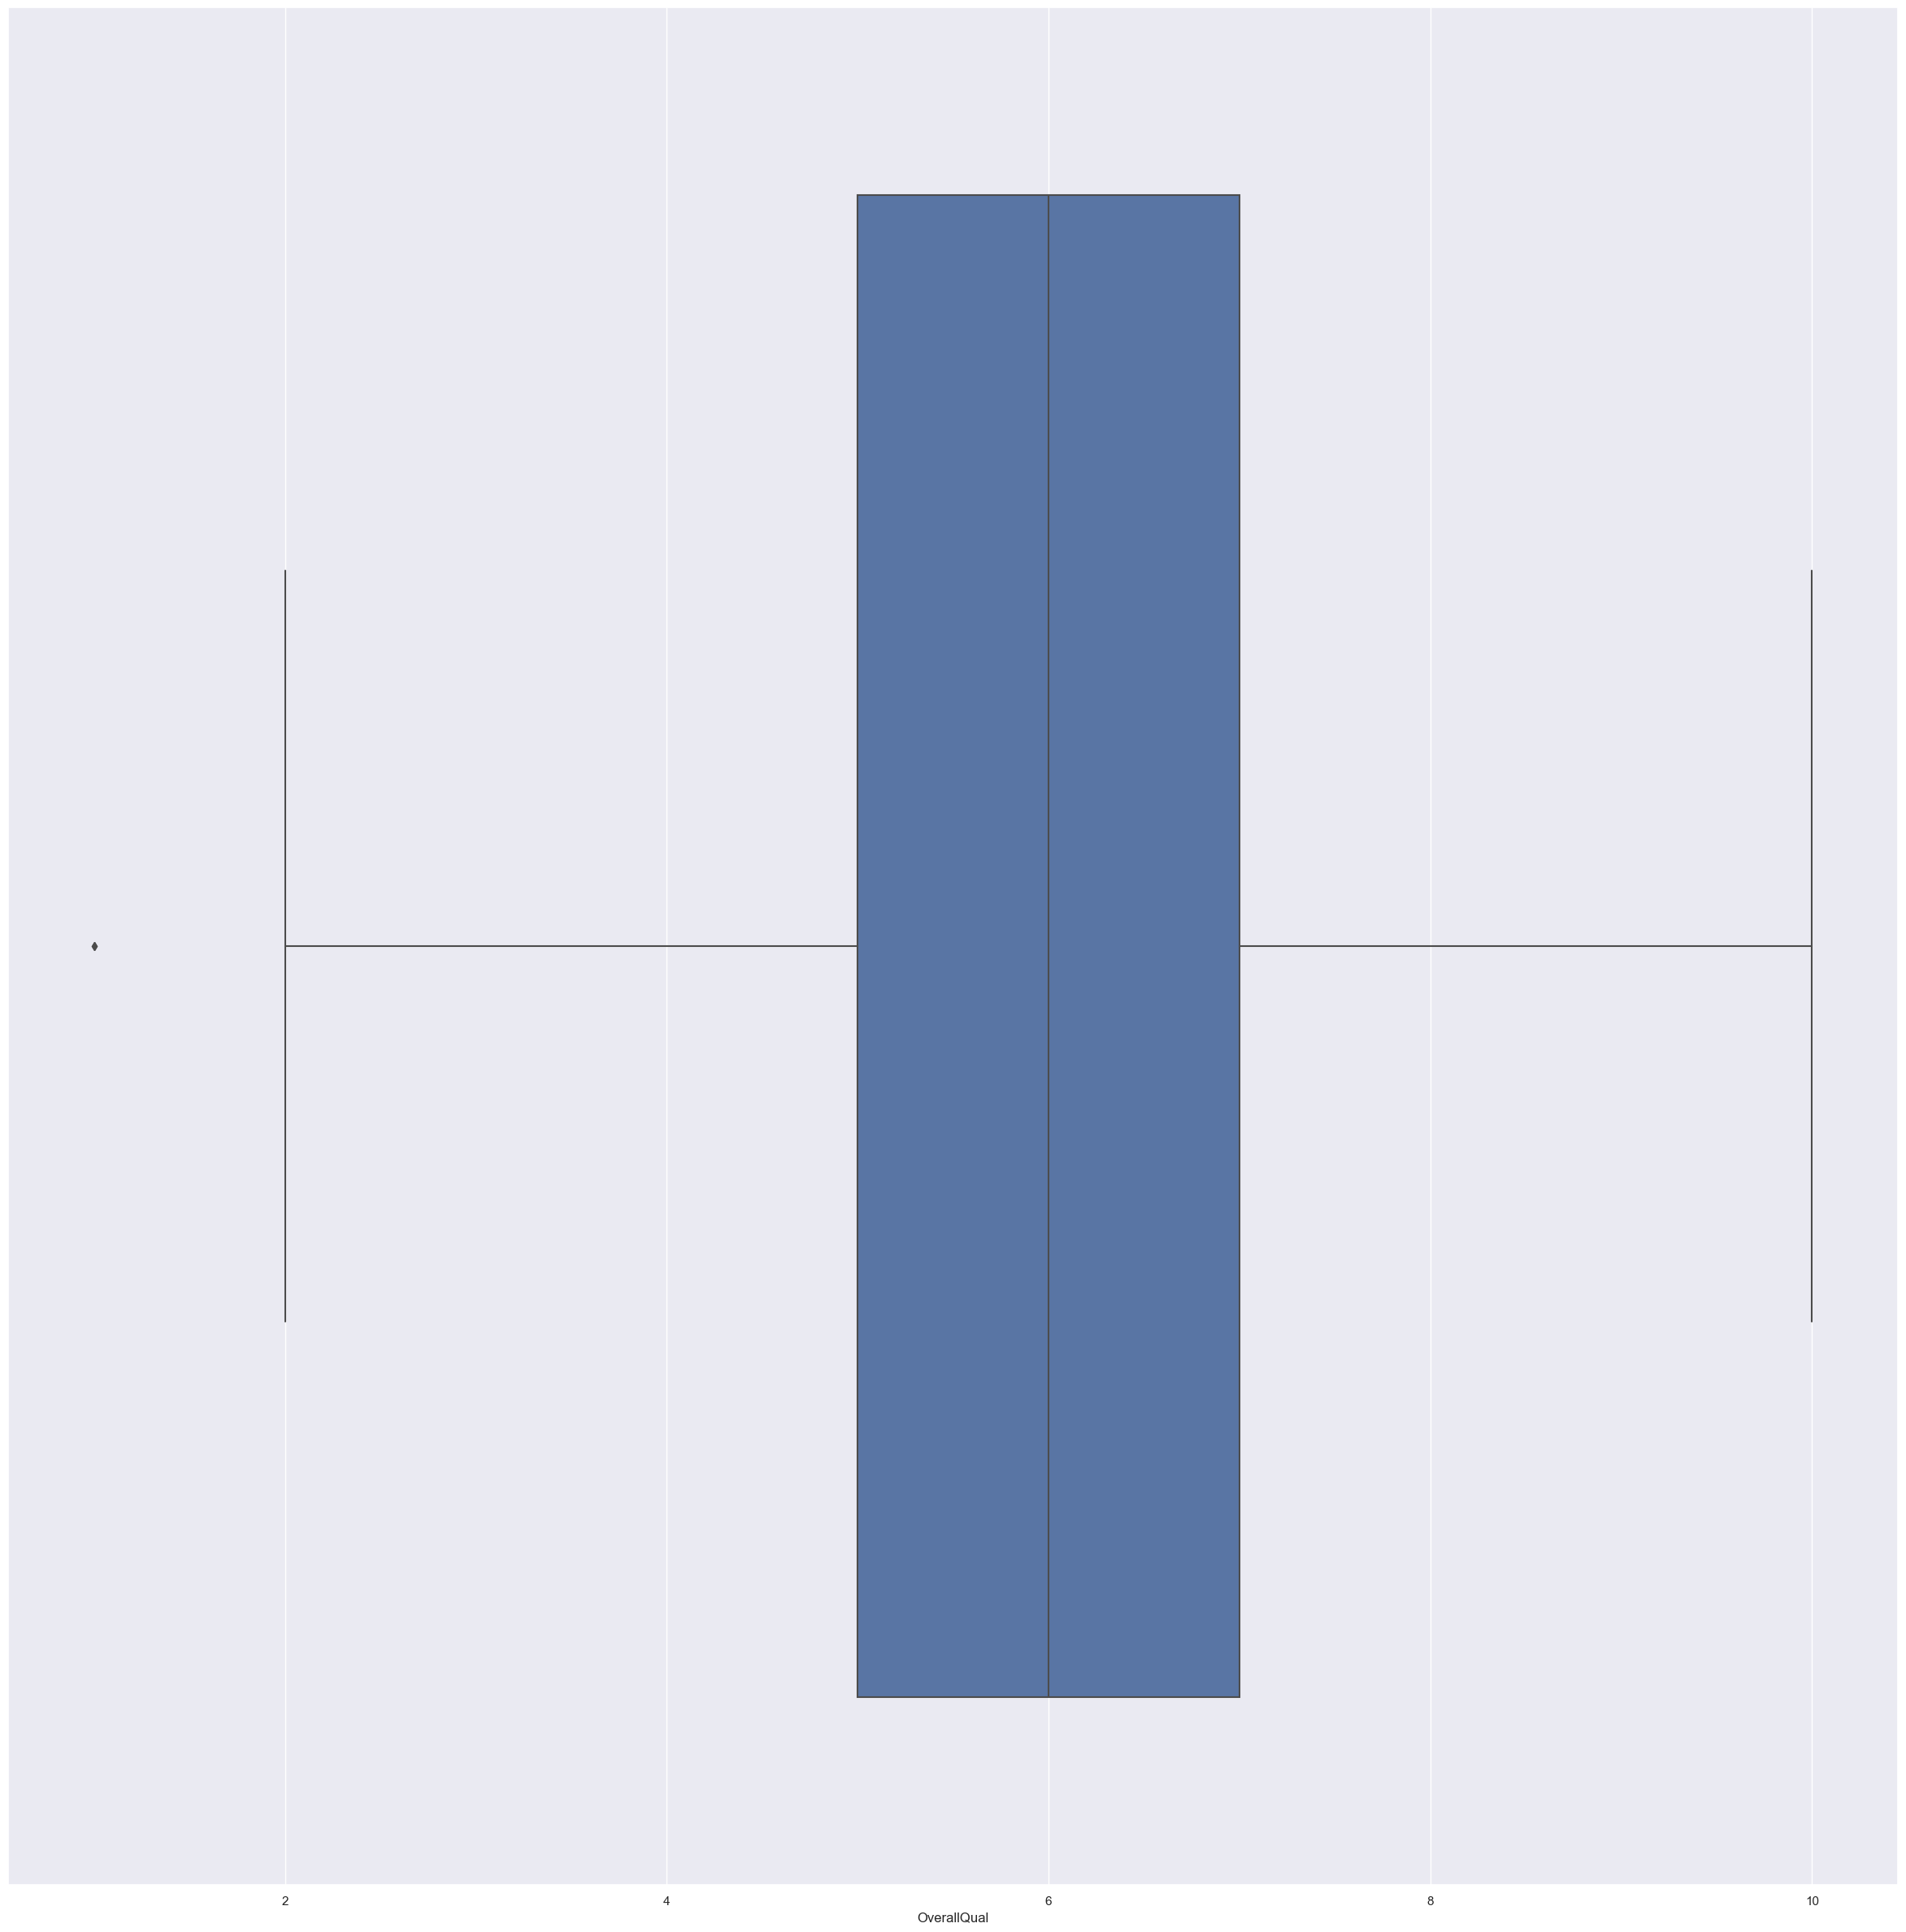

In [79]:
sns.boxplot(x = df_ready.OverallQual)

<AxesSubplot: xlabel='GrLivArea'>

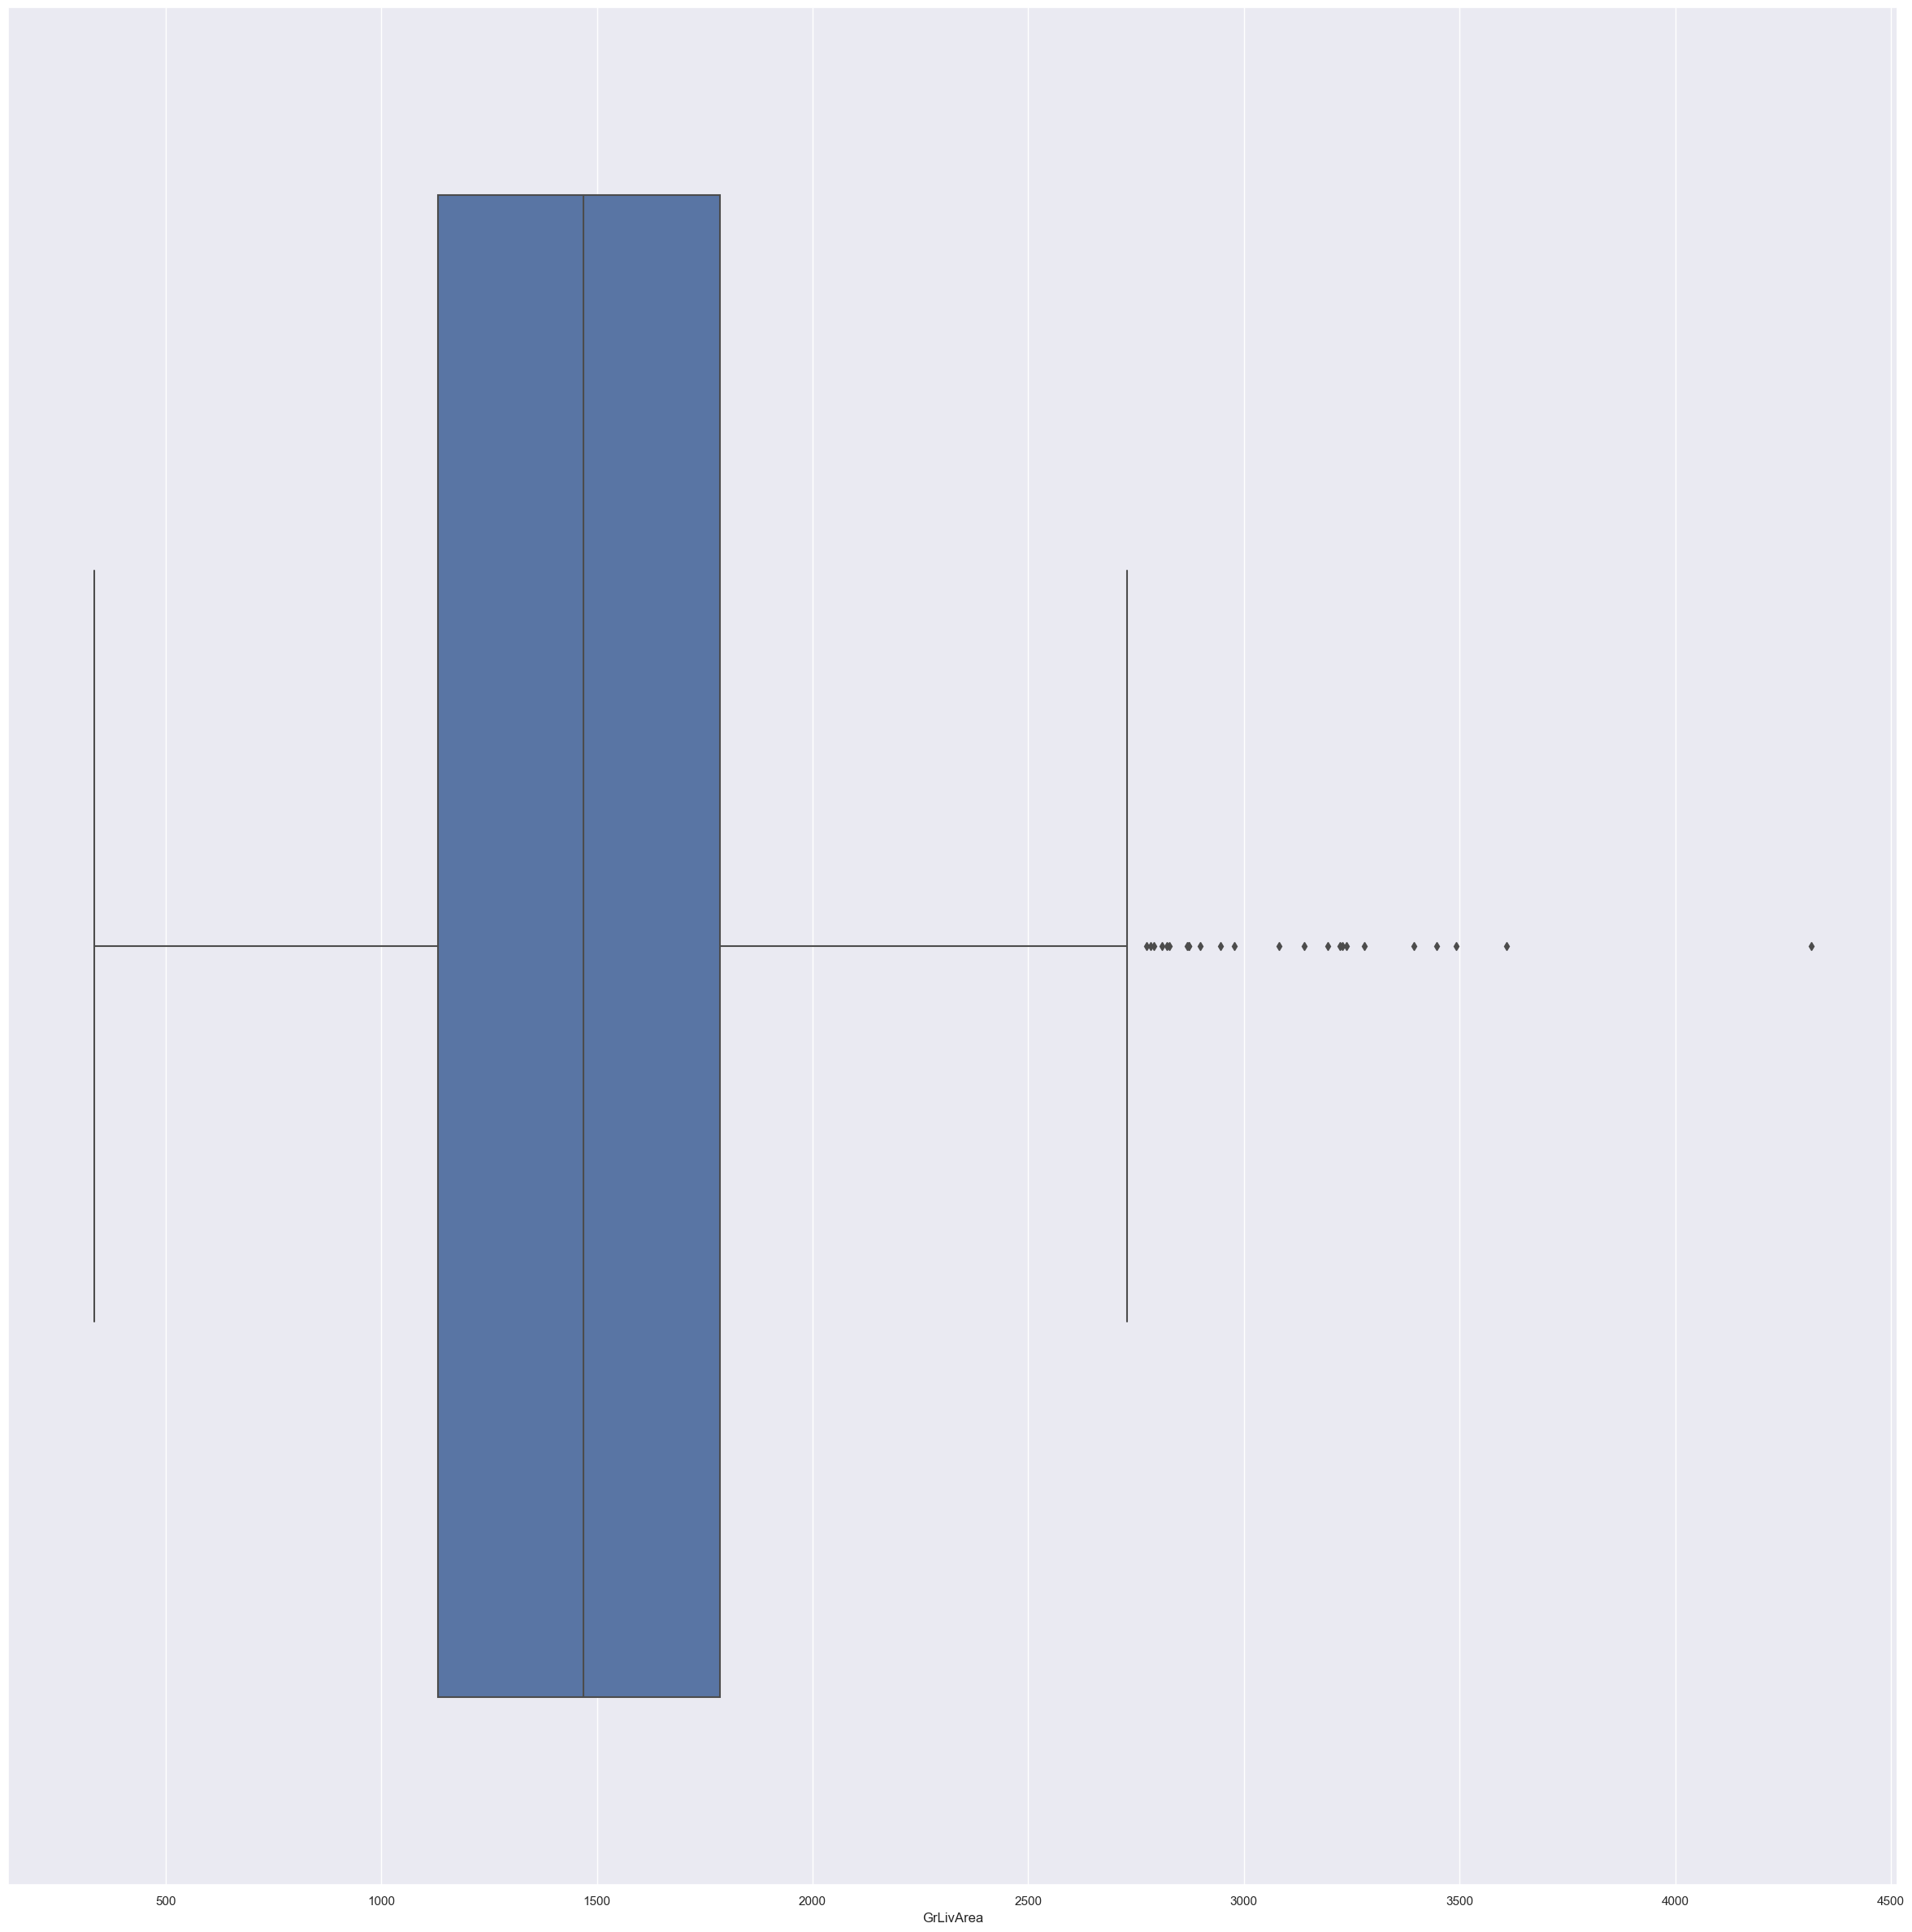

In [83]:
sns.boxplot(x = df_ready.GrLivArea)

<AxesSubplot: xlabel='TotalBsmtSF'>

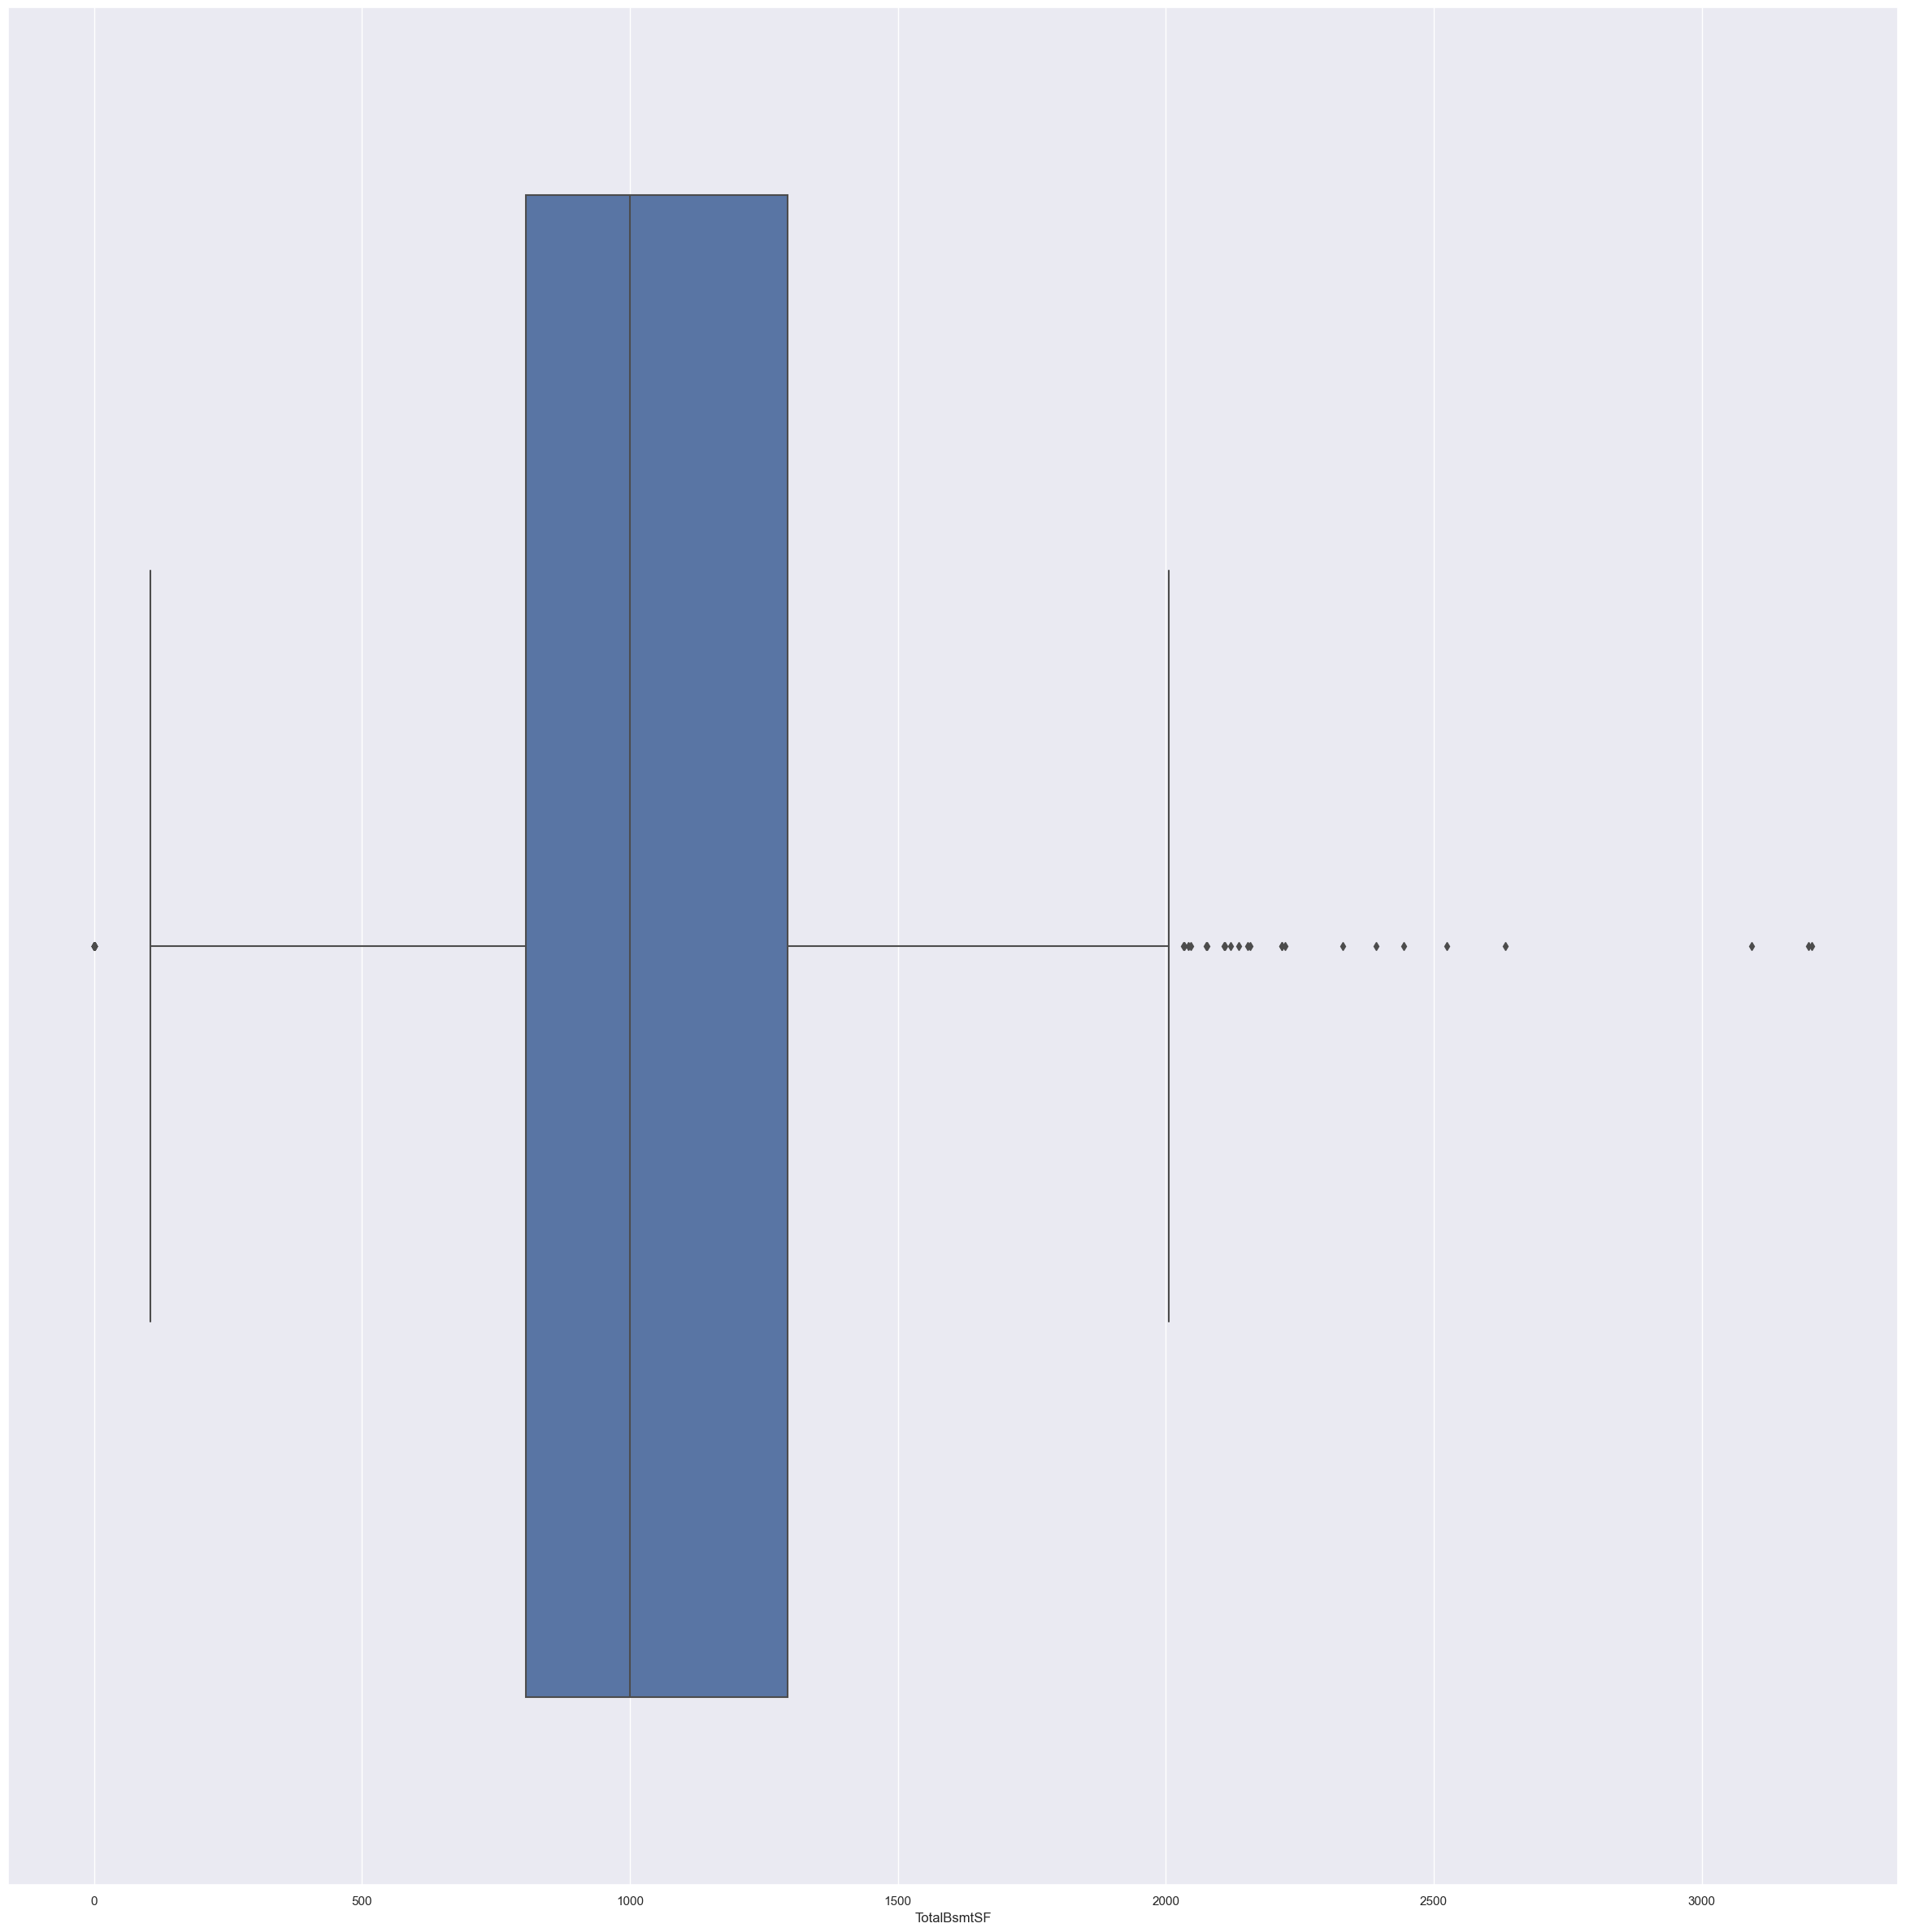

In [84]:
sns.boxplot(x = df_ready.TotalBsmtSF)

<AxesSubplot: xlabel='1stFlrSF'>

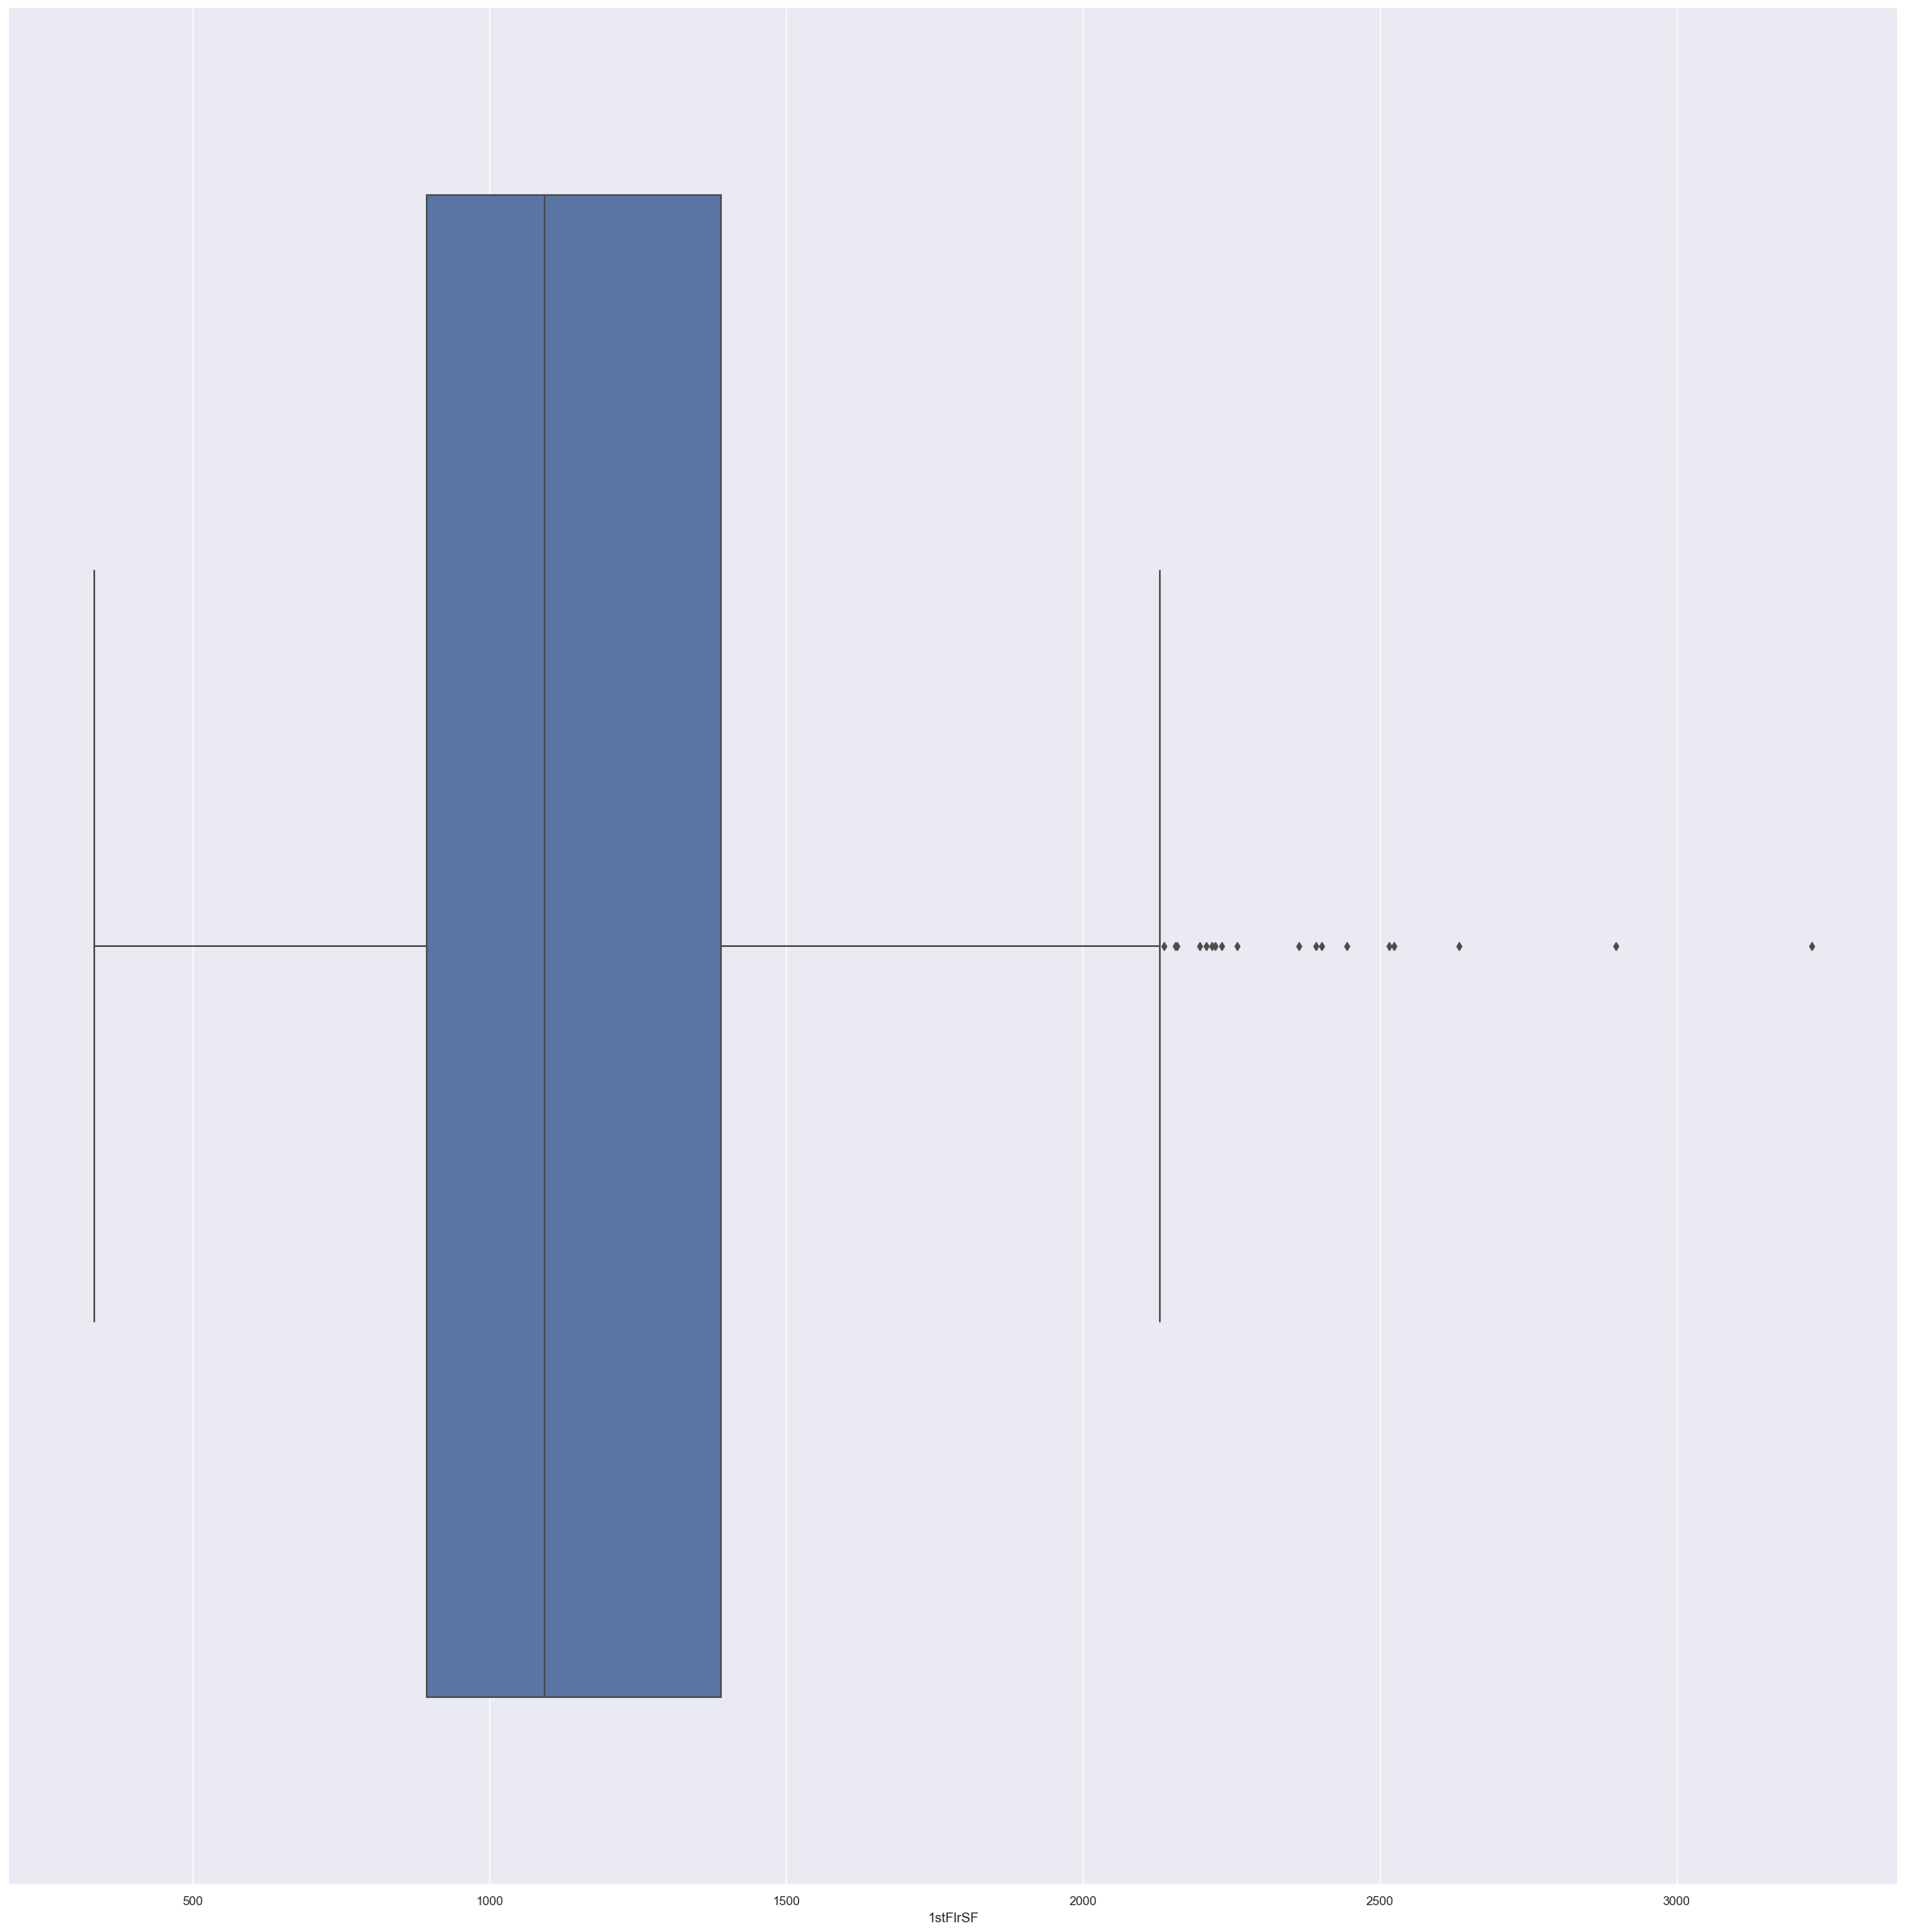

In [87]:
sns.boxplot(x = df_ready['1stFlrSF'])

<AxesSubplot: xlabel='GarageCars'>

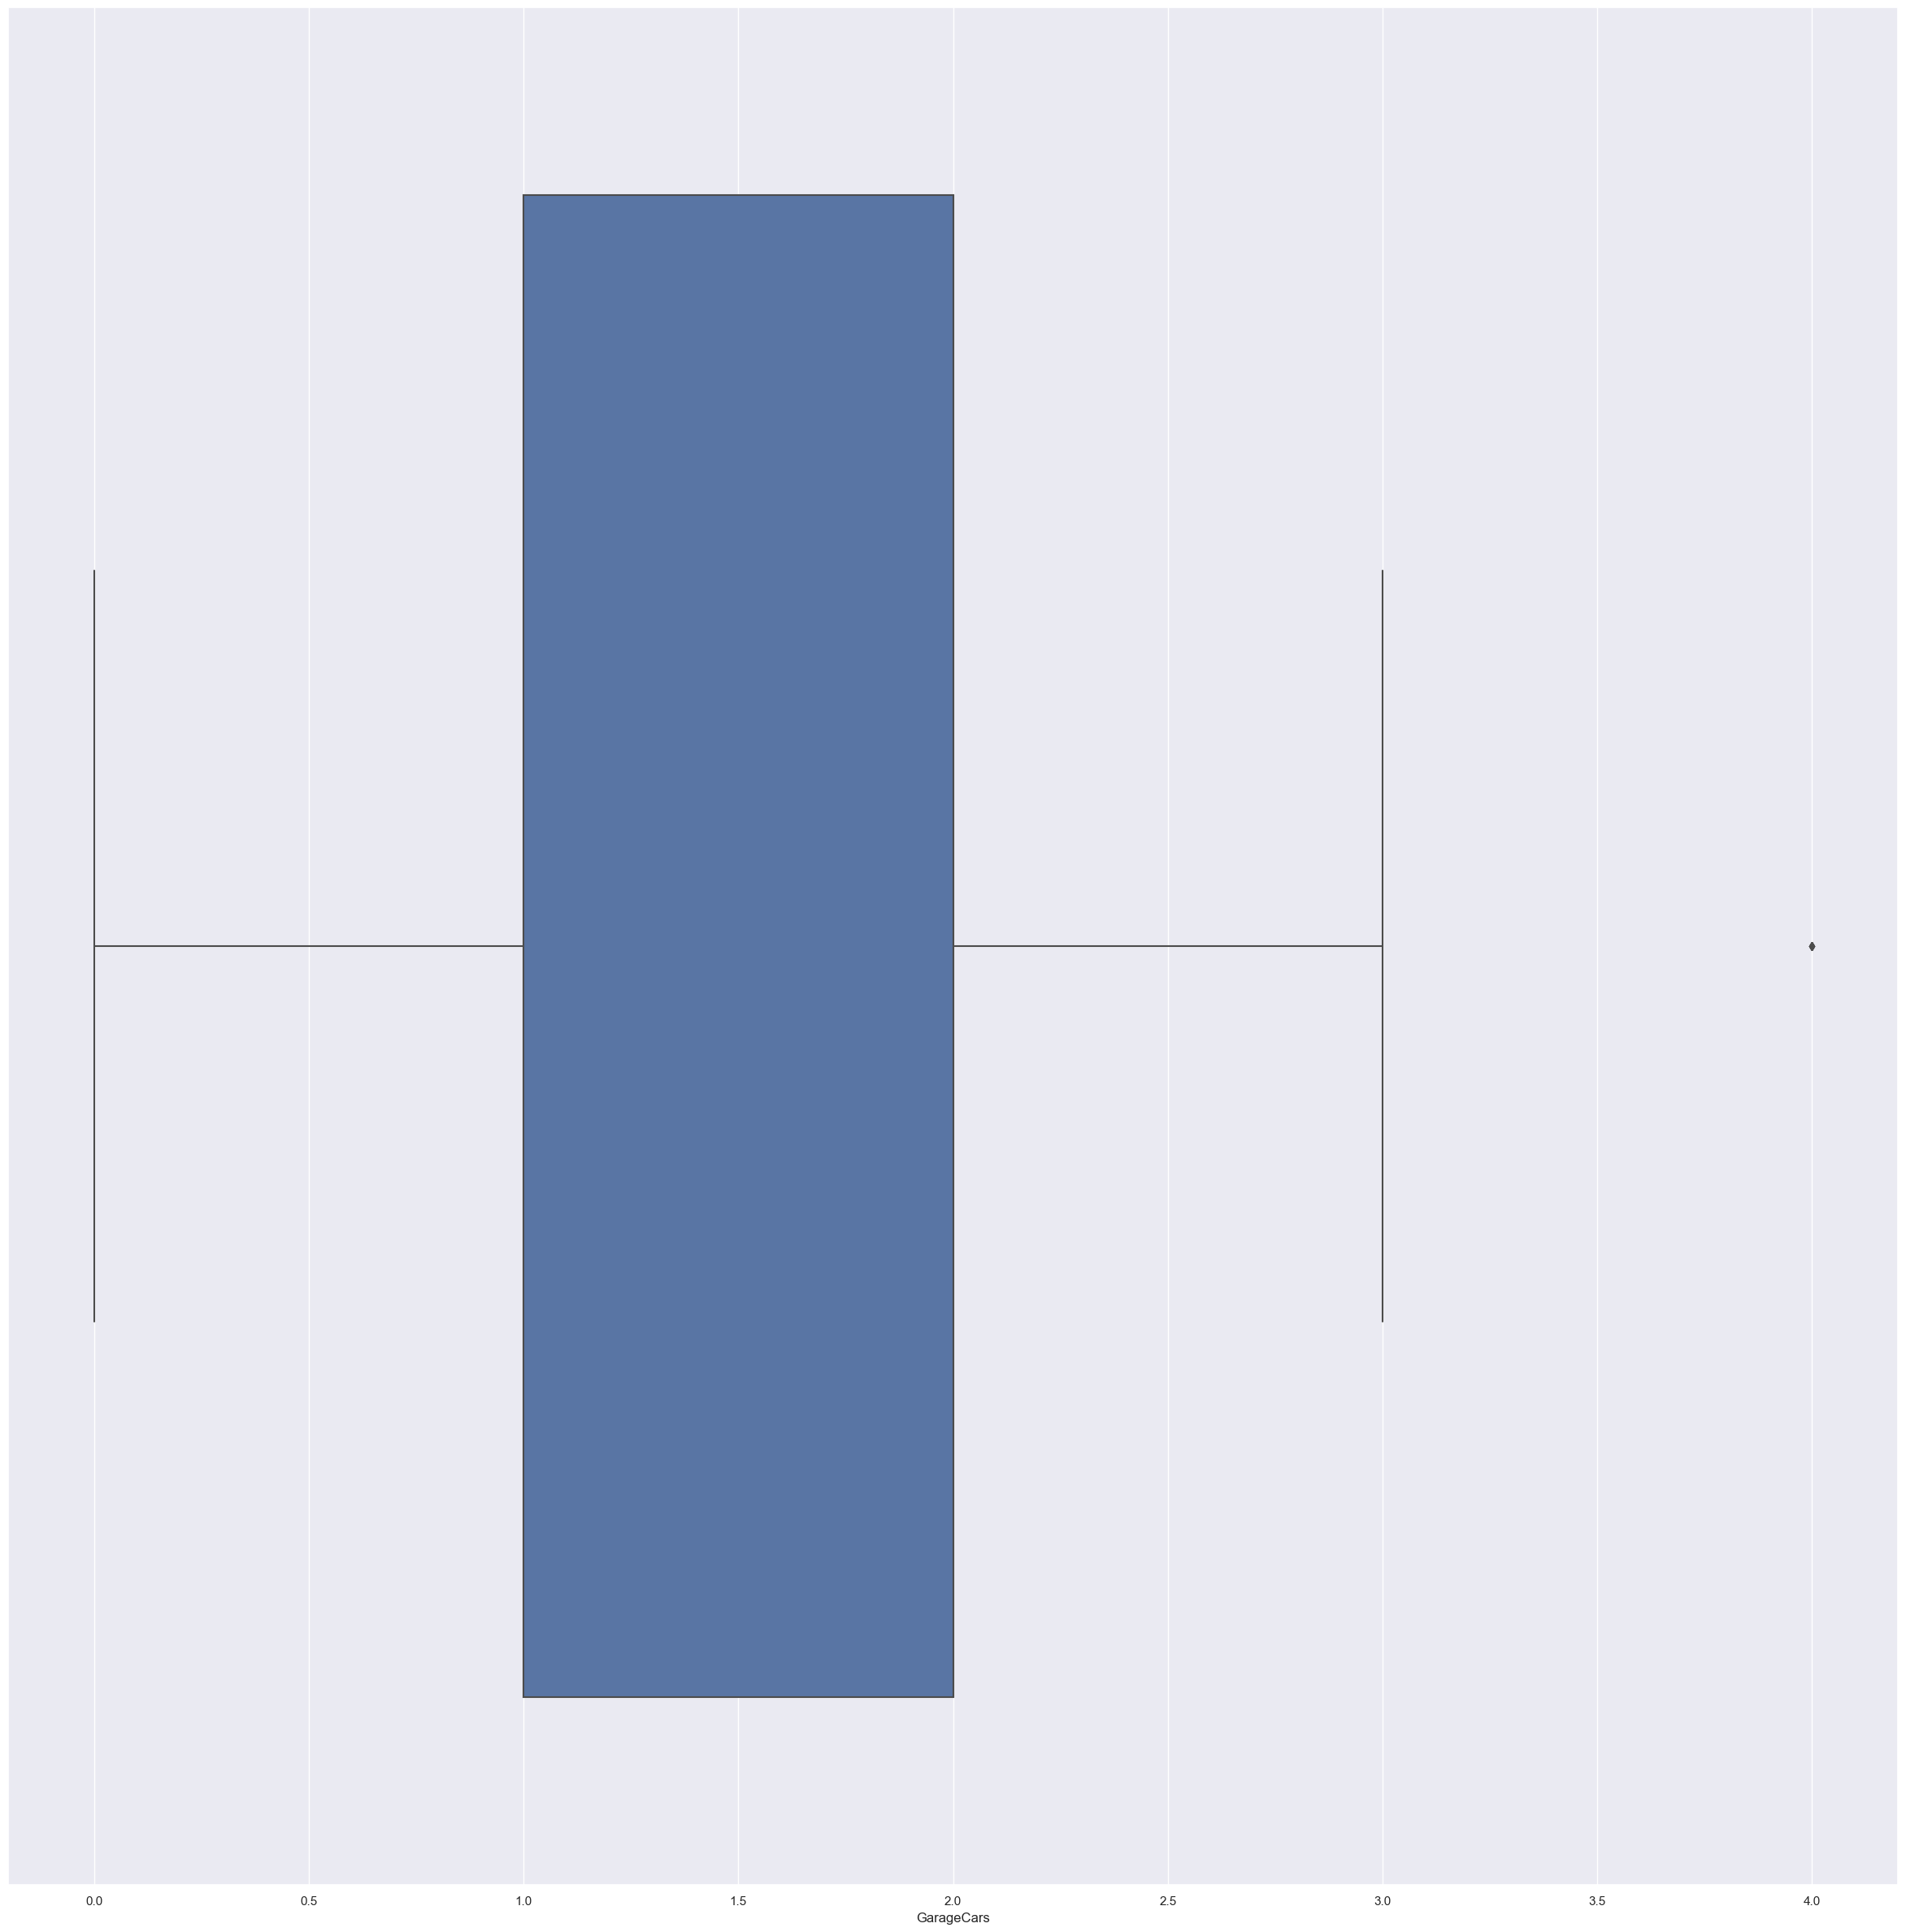

In [88]:
sns.boxplot(x = df_ready.GarageCars)

<AxesSubplot: xlabel='GarageArea'>

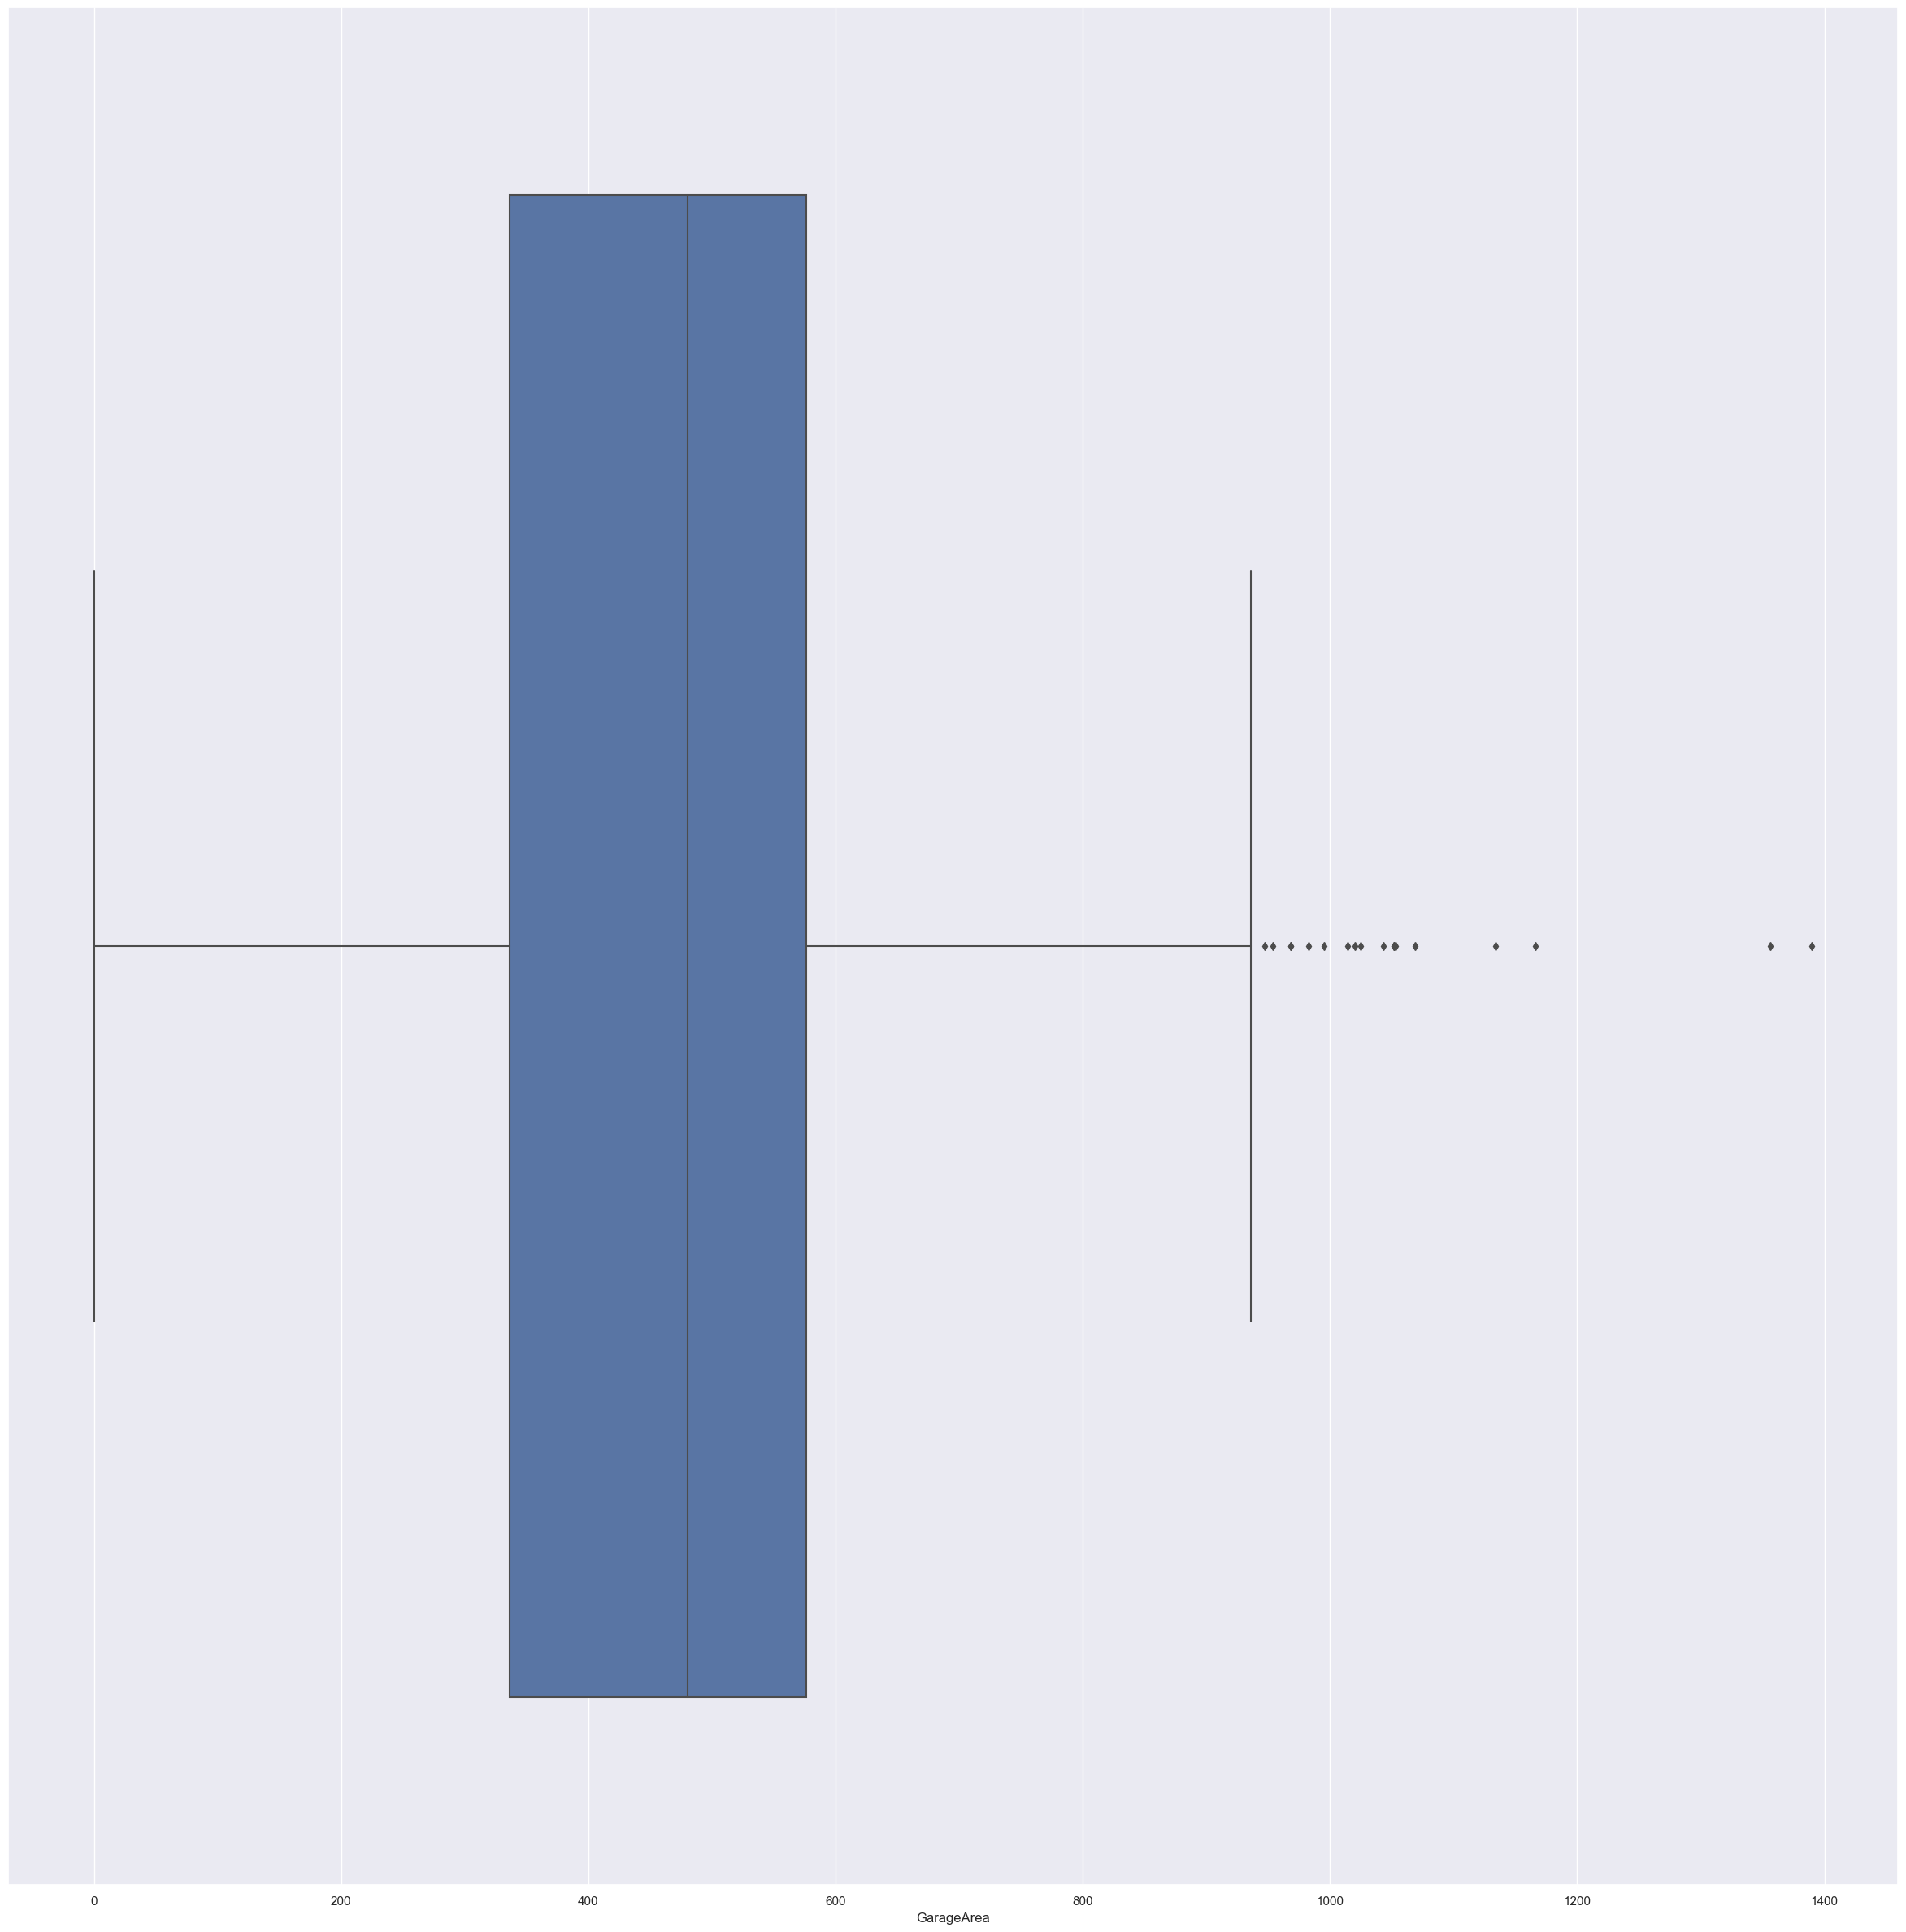

In [89]:
sns.boxplot(x = df_ready['GarageArea'])